#### Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
import folium
from folium.plugins import HeatMap
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mticker

### Load the Data

In [2]:
houses = pd.read_csv('data\king_county_house_data.csv')
houses.info()
houses

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors   
0      7129300520       3.0       1.00       1180.0    5650.0     1.0  \
1      6414100192       3.0       2.25       2570.0    7242.0     2.0   
2      5631500400       2.0       1.00        770.0   10000.0     1.0   
3      2487200875       4.0       3.00       1960.0    5000.0     1.0   
4      1954400510       3.0       2.00       1680.0    8080.0     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018       3.0       2.50       1530.0    1131.0     3.0   
21593  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21594  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21595   291310100       3.0       2.50       1600.0    2388.0     2.0   
21596  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode   
0             NaN   0.0          3      7  ...           0.0    98178  \
1             0.0   0.0          3      7  ...       19910.0    98125   
2             0.0   0.0          3      6  ...           NaN    98028   
3             0.0   0.0          5      7  ...           0.0    98136   
4             0.0   0.0          3      8  ...           0.0    98074   
...           ...   ...        ...    ...  ...           ...      ...   
21592         0.0   0.0          3      8  ...           0.0    98103   
21593         0.0   0.0          3      8  ...           0.0    98146   
21594         0.0   0.0          3      7  ...           0.0    98144   
21595         NaN   0.0          3      8  ...           0.0    98027   
21596         0.0   0.0          3      7  ...           0.0    98144   

           lat     long  sqft_living15  sqft_lot15        date     price   
0      47.5112 -122.257         1340.0      5650.0  2014-10-13  221900.0  \
1      47.7210 -122.319         1690.0      7639.0  2014-12-09  538000.0   
2      47.7379 -122.233         2720.0      8062.0  2015-02-25  180000.0   
3      47.5208 -122.393         1360.0      5000.0  2014-12-09  604000.0   
4      47.6168 -122.045         1800.0      7503.0  2015-02-18  510000.0   
...        ...      ...            ...         ...         ...       ...   
21592  47.6993 -122.346         1530.0      1509.0  2014-05-21  360000.0   
21593  47.5107 -122.362         1830.0      7200.0  2015-02-23  400000.0   
21594  47.5944 -122.299         1020.0      2007.0  2014-06-23  402101.0   
21595  47.5345 -122.069         1410.0      1287.0  2015-01-16  400000.0   
21596  47.5941 -122.299         1020.0      1357.0  2014-10-15  325000.0   

         house_id   id.1  
0      7129300520      1  
1      6414100192      2  
2      5631500400      3  
3      2487200875      4  
4      1954400510      5  
...           ...    ...  
21592   263000018  21593  
21593  6600060120  21594  
21594  1523300141  21595  
21595   291310100  21596  
21596  1523300157  21597  

[21597 rows x 23 columns]

### Quick Data Overview & Preprocessing

In [3]:
houses.shape

(21597, 23)

In [4]:
houses.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront   
0  7129300520       3.0       1.00       1180.0    5650.0     1.0         NaN  \
1  6414100192       3.0       2.25       2570.0    7242.0     2.0         0.0   
2  5631500400       2.0       1.00        770.0   10000.0     1.0         0.0   
3  2487200875       4.0       3.00       1960.0    5000.0     1.0         0.0   
4  1954400510       3.0       2.00       1680.0    8080.0     1.0         0.0   

   view  condition  grade  ...  yr_renovated  zipcode      lat     long   
0   0.0          3      7  ...           0.0    98178  47.5112 -122.257  \
1   0.0          3      7  ...       19910.0    98125  47.7210 -122.319   
2   0.0          3      6  ...           NaN    98028  47.7379 -122.233   
3   0.0          5      7  ...           0.0    98136  47.5208 -122.393   
4   0.0          3      8  ...           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15        date     price    house_id id.1  
0         1340.0      5650.0  2014-10-13  221900.0  7129300520    1  
1         1690.0      7639.0  2014-12-09  538000.0  6414100192    2  
2         2720.0      8062.0  2015-02-25  180000.0  5631500400    3  
3         1360.0      5000.0  2014-12-09  604000.0  2487200875    4  
4         1800.0      7503.0  2015-02-18  510000.0  1954400510    5  

[5 rows x 23 columns]

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [6]:
houses.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

In [7]:
houses.waterfront.nunique() # nulls is waterfront mean 'no waterfront view'

2

In [8]:
houses['waterfront'].value_counts(normalize=True).head(10)

waterfront
0.0    0.992398
1.0    0.007602
Name: proportion, dtype: float64

Check for rows duplicates

In [9]:
houses[houses.duplicated(['id'])].shape[0]

177

Check for duplicates for longitude and latitude

In [10]:
# Look for duplicate data using lat/long (which should be unique for the house)
houses[houses.duplicated(subset=['lat','long'], keep=False)].sort_values('lat').shape[0]

1505

In [11]:
# Drop the duplicates for lon and lat, keep the last appeared
houses.drop_duplicates(['lat','long'], keep='last', inplace=True)

In [12]:
houses[houses.duplicated(['id'])].shape[0]


0

In [13]:
houses['zipcode'].nunique()

70

#### Checking for outliers 

Outliers for latitude and longitude

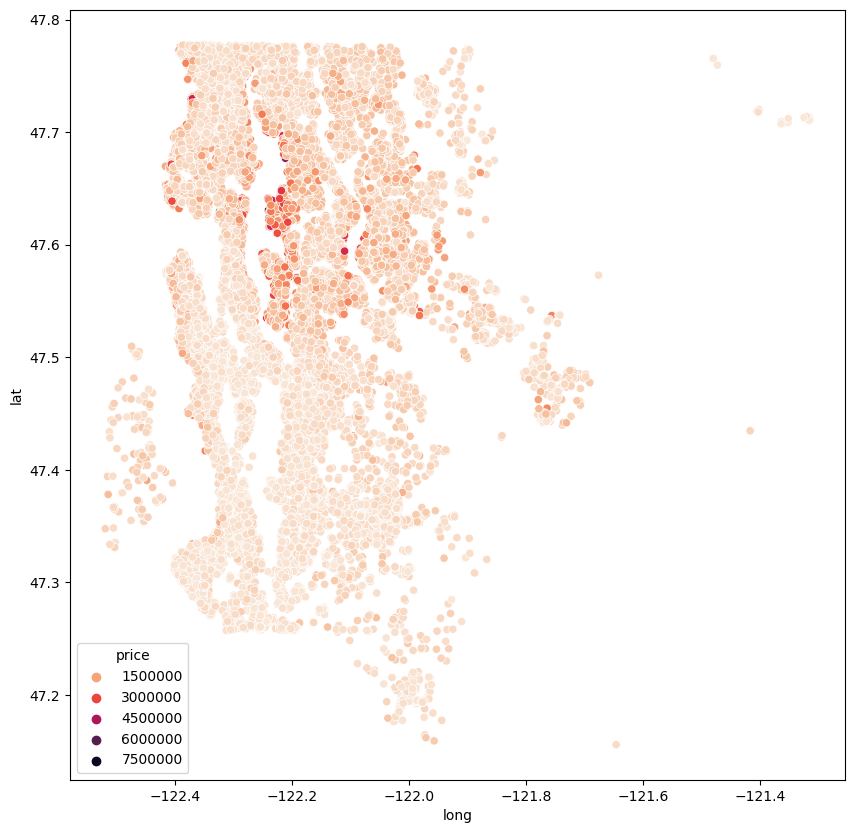

In [14]:
# plotting latitude and longitude as scatter plot to check for location outliers

plt.figure(figsize=(10,10))
sns.scatterplot(data=houses, x="long", y="lat", hue="price", palette="rocket_r");

Location affect the price - the closer to the center, the higher is the price. Also, we wan't to remove outliers - locations far away from the area we are focusing on.

In [15]:
# drop the properties located far east 
houses.drop(houses[houses['long'] > -121.7].index, inplace=True)

#### Checking for outliers for numerical data

In [16]:
# Analyzing range of values (minimum, maximum) and their relationships to the interquartile range (IQR)
houses.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot   
count  2.079500e+04  20795.000000  20795.000000  20795.000000  2.079500e+04  \
mean   4.577433e+09      3.382688      2.119464   2093.060063  1.539929e+04   
std    2.875762e+09      0.926161      0.770559    922.022896  4.208954e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123044e+09      3.000000      1.750000   1440.000000  5.102000e+03   
50%    3.904960e+09      3.000000      2.250000   1930.000000  7.680000e+03   
75%    7.305600e+09      4.000000      2.500000   2560.000000  1.080000e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade   
count  20795.000000  18503.000000  20733.000000  20795.000000  20795.000000  \
mean       1.487016      0.007783      0.238460      3.414090      7.666170   
std        0.533367      0.087877      0.772659      0.651323      1.177858   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

       ...      yr_built  yr_renovated       zipcode           lat   
count  ...  20795.000000  17087.000000  20795.000000  20795.000000  \
mean   ...   1970.860207    848.043542  98077.661649     47.559270   
std    ...     29.225107   4026.070845     53.606545      0.138938   
min    ...   1900.000000      0.000000  98001.000000     47.159300   
25%    ...   1951.000000      0.000000  98033.000000     47.468750   
50%    ...   1975.000000      0.000000  98065.000000     47.571000   
75%    ...   1996.000000      0.000000  98117.000000     47.677600   
max    ...   2015.000000  20150.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15         price      house_id   
count  20795.000000   20795.000000   20795.000000  2.079500e+04  2.079500e+04  \
mean    -122.213880    1995.632219   12972.324790  5.436722e+05  4.577433e+09   
std        0.138583     687.471418   27659.658436  3.698955e+05  2.875762e+09   
min     -122.519000     399.000000     659.000000  7.800000e+04  1.000102e+06   
25%     -122.327000    1490.000000    5158.000000  3.241800e+05  2.123044e+09   
50%     -122.229000    1850.000000    7669.000000  4.520000e+05  3.904960e+09   
75%     -122.124000    2378.000000   10128.000000  6.500000e+05  7.305600e+09   
max     -121.701000    6210.000000  871200.000000  7.700000e+06  9.900000e+09   

               id.1  
count  20795.000000  
mean   10826.455109  
std     6211.122129  
min        1.000000  
25%     5464.500000  
50%    10859.000000  
75%    16197.500000  
max    21597.000000  

[8 rows x 22 columns]

In [17]:
houses['bedrooms'].value_counts()

bedrooms
3.0     9384
4.0     6732
2.0     2614
5.0     1564
6.0      257
1.0      183
7.0       38
8.0       12
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64

In [18]:
houses['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [19]:
houses['price'][houses['bedrooms']==33]

15856    640000.0
Name: price, dtype: float64

Text(0.5, 1.0, 'Number of Bedrooms VS Price')

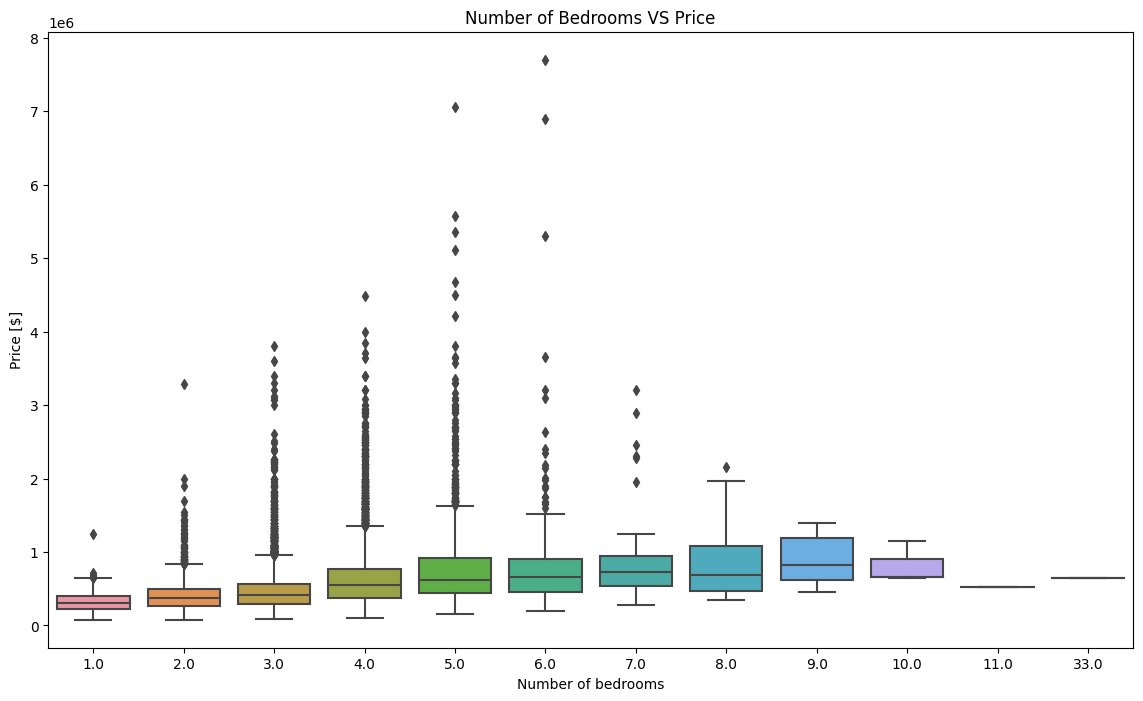

In [20]:
plt.figure(figsize=(14,8))
sns.boxplot(x='bedrooms', y='price', data=houses)
plt.ylabel('Price [$]')
plt.xlabel('Number of bedrooms')
plt.title('Number of Bedrooms VS Price')

In [21]:
houses.bathrooms.value_counts()

bathrooms
2.50    5160
1.00    3681
1.75    2946
2.25    1964
2.00    1865
1.50    1383
2.75    1155
3.00     730
3.50     719
3.25     566
3.75     152
4.00     132
4.50      97
4.25      78
0.75      68
4.75      23
5.00      20
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

Potential outliers exist in bedrooms, bathrooms, sqft_living, sqft_lot, price - the difference between the last interquartile and max value is significant. These we wan't to keep for now, for the further analysis and vizualizations.

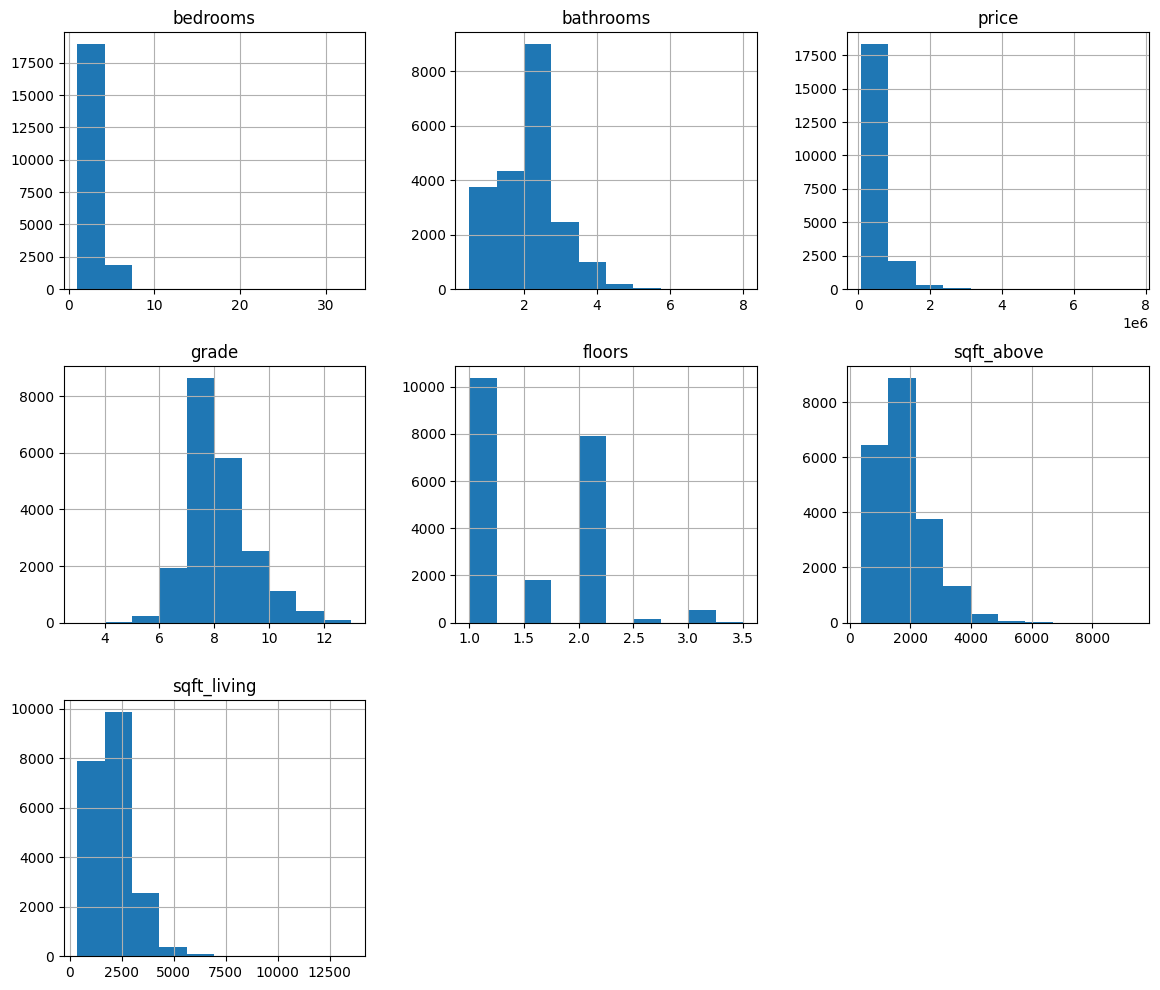

In [22]:
hist_analysis = houses[['bedrooms', 'bathrooms', 'price', 'grade', 'floors', 'sqft_above', 'sqft_living']]
hist_analysis.hist(figsize=(14,12));

Most of the numerical data, such as sqft_living, sqft_above, and price, exhibit a right-skewed distribution, meaning that the majority of values are concentrated on the lower end, while a smaller number of extreme values (outliers) extend toward the higher end. As a result, the right side of the histogram is more spread out, whereas the left side is narrower, indicating lower variability in smaller values.

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation analysis')

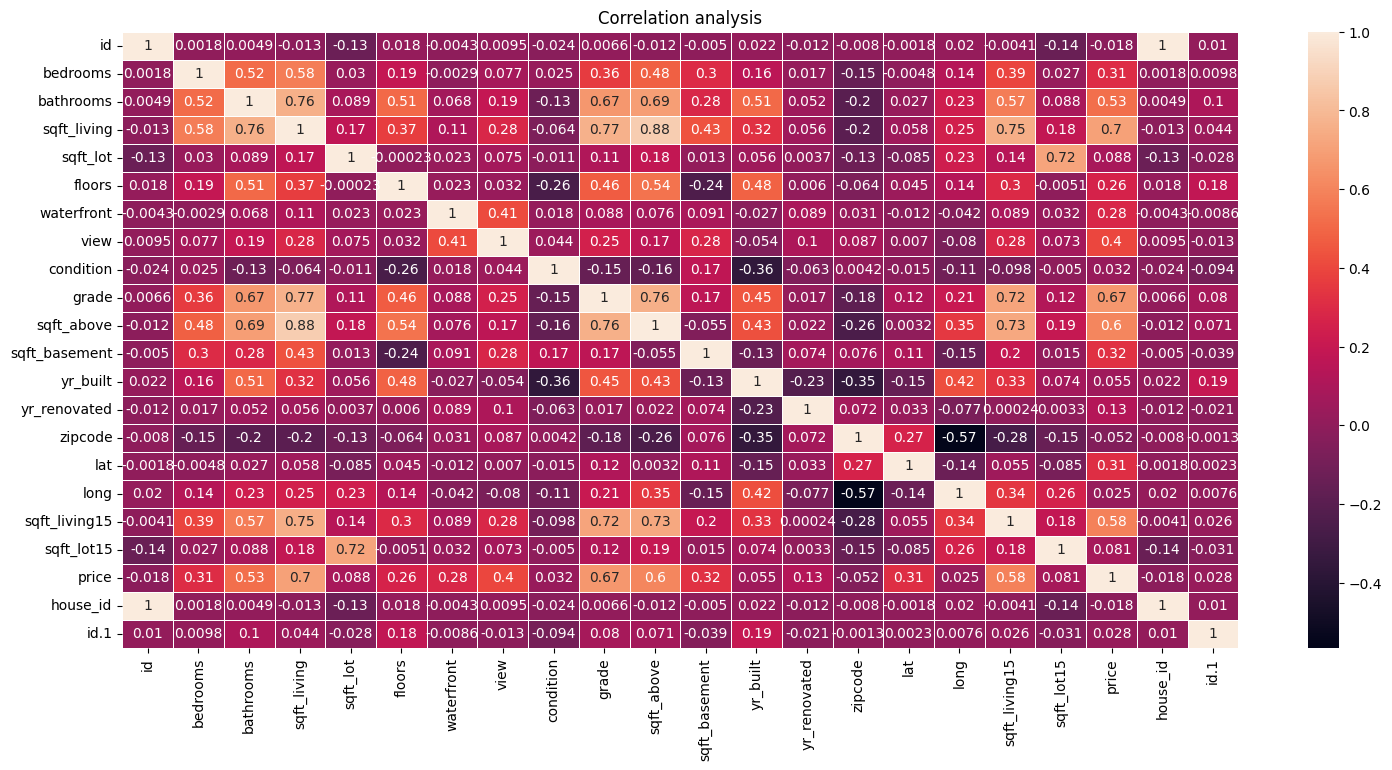

In [23]:
plt.figure(figsize=(18,8))
corr=houses.drop('date',axis=1).corr(method='pearson')
sns.heatmap(corr,
            annot=True ,
            linewidths=0.5)
plt.title('Correlation analysis')

### Handle missing values and change data types

View

In [24]:
houses.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [25]:
# Handle missing values for 'view_quality'
houses['view'].fillna(houses['view'].median(), inplace=True)  # Replace NaN with mode
# Change the data type for 'view' rating column
houses.view = houses.view.astype('Int64')

Sqft_basement

In [26]:
# Handle missing values for 'sqft_basement'
houses['sqft_basement'].fillna(houses['sqft_basement'].median(), inplace=True)  # Replace NaN with mode

Bathrooms / Bedrooms / Floors

In [27]:
print('Unique numbers of bathrooms:')
print(houses['bathrooms'].unique())  # Check unique values in the column

print('Unique numbers of bedrooms:')
print(houses['bedrooms'].unique())  # Check unique values in the column

print('Unique numbers of floors:')
print(houses['floors'].unique())  # Check unique values in the column

Unique numbers of bathrooms:
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 1.25 3.75 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Unique numbers of bedrooms:
[ 3.  2.  4.  5.  1.  6.  7.  8.  9. 11. 10. 33.]
Unique numbers of floors:
[1.  2.  1.5 3.  2.5 3.5]


In [28]:
# Change data types to integer for the number of bedrooms:
houses['bedrooms'] = houses['bedrooms'].astype('int')

Parsing datetime

In [29]:
#exploring the length of date objects & check for fishy dates
lengths = houses["date"].str.len()
lengths.value_counts()

date
10    20795
Name: count, dtype: int64

In [30]:
houses["date"] = pd.to_datetime(houses["date"])

Remove redundant 'ID' column

In [31]:
houses.drop(['id', 'id.1'], axis=1, inplace=True)

### Handle Binary Data

Waterfront

In [32]:
# Replace missing values for the waterfront with median, and convert to integer type
houses['waterfront'].fillna(houses['waterfront'].mode()[0], inplace=True)
houses['waterfront']=houses['waterfront'].astype('int')

In [33]:
houses.waterfront.unique()

array([0, 1])

Renovation year

In [34]:
houses.yr_renovated.value_counts(normalize=True).head()

yr_renovated
0.0        0.957512
20140.0    0.004214
20130.0    0.001814
20070.0    0.001756
20030.0    0.001697
Name: proportion, dtype: float64

In [35]:
# 96% of houses have not been renovated - lets make binary data out of it 

In [36]:
# We will mark renovated houses as 1 (so anything above 0 will be assigned as 1)
houses.loc[houses['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0 (houses which have not been renovated)
houses.loc[houses['yr_renovated'] != 1, 'yr_renovated'] = 0

In [37]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20795 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bedrooms       20795 non-null  int32         
 1   bathrooms      20795 non-null  float64       
 2   sqft_living    20795 non-null  float64       
 3   sqft_lot       20795 non-null  float64       
 4   floors         20795 non-null  float64       
 5   waterfront     20795 non-null  int32         
 6   view           20795 non-null  Int64         
 7   condition      20795 non-null  int64         
 8   grade          20795 non-null  int64         
 9   sqft_above     20795 non-null  float64       
 10  sqft_basement  20795 non-null  float64       
 11  yr_built       20795 non-null  int64         
 12  yr_renovated   20795 non-null  float64       
 13  zipcode        20795 non-null  int64         
 14  lat            20795 non-null  float64       
 15  long           20795 non

#### Rename the columns

In [38]:
new_cols_names={'sqft_lot':'parcel_sqft', 'sqft_living':'living_sqft', "view":"view_quality", "grade":"KC_grade",
                "yr_built":"built_year", "yr_renovated":"renovated", "lat":"latitude", "long":"longitude",
                }

houses.rename(new_cols_names, axis=1, inplace=True)

#### Feature Engineering

1.1. Add age categories for houses based on what time they have been built

Add the column with the clasification to Modern, 'Mid-century', 'Late-modern' and Historical houses

In [39]:
def categorize_age(year):
    if 1900 <= year <= 1940:
        return 'Historical'
    elif 1941 <= year <= 1970:
        return 'Mid-century'
    elif 1971 <= year <= 2004:
        return 'Late-modern'
    elif 2005 <= year <= 2015:
        return 'Modern'

# Apply function to create a new column 'age_range'
houses['age_category'] = houses['built_year'].apply(categorize_age)
houses.head(4)

bedrooms  bathrooms  living_sqft  parcel_sqft  floors  waterfront   
0         3       1.00       1180.0       5650.0     1.0           0  \
1         3       2.25       2570.0       7242.0     2.0           0   
2         2       1.00        770.0      10000.0     1.0           0   
3         4       3.00       1960.0       5000.0     1.0           0   

   view_quality  condition  KC_grade  sqft_above  ...  renovated  zipcode   
0             0          3         7      1180.0  ...        0.0    98178  \
1             0          3         7      2170.0  ...        1.0    98125   
2             0          3         6       770.0  ...        0.0    98028   
3             0          5         7      1050.0  ...        0.0    98136   

   latitude  longitude  sqft_living15  sqft_lot15       date     price   
0   47.5112   -122.257         1340.0      5650.0 2014-10-13  221900.0  \
1   47.7210   -122.319         1690.0      7639.0 2014-12-09  538000.0   
2   47.7379   -122.233         2720.0      8062.0 2015-02-25  180000.0   
3   47.5208   -122.393         1360.0      5000.0 2014-12-09  604000.0   

     house_id  age_category  
0  7129300520   Mid-century  
1  6414100192   Mid-century  
2  5631500400    Historical  
3  2487200875   Mid-century  

[4 rows x 22 columns]

### Price VS Size of the Living Space and Parcel Size 

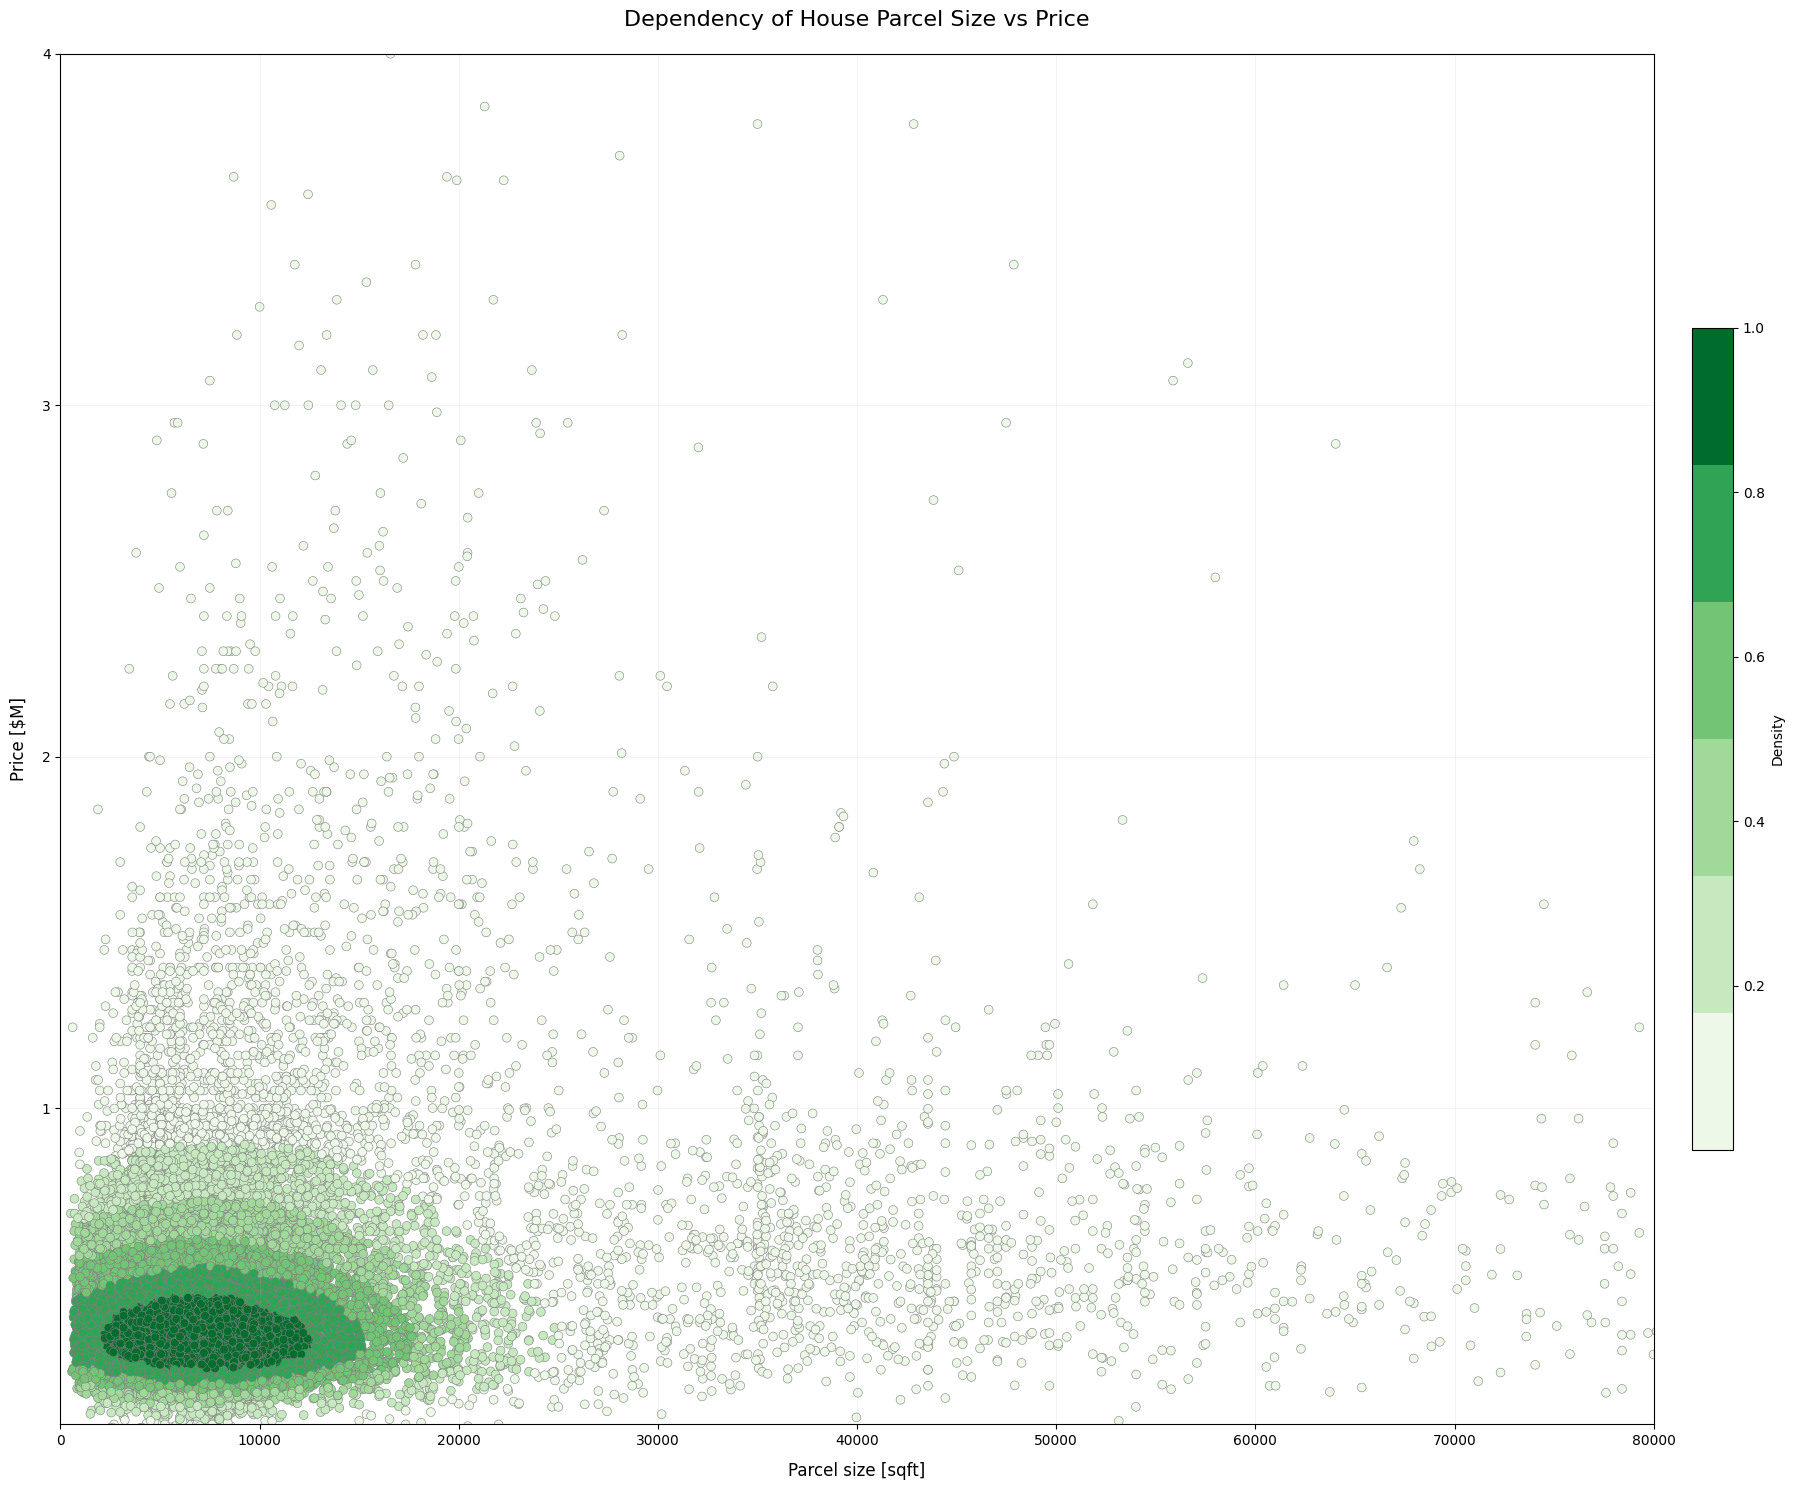

Spearman Correlation (parcel_sqft vs price): 0.0778


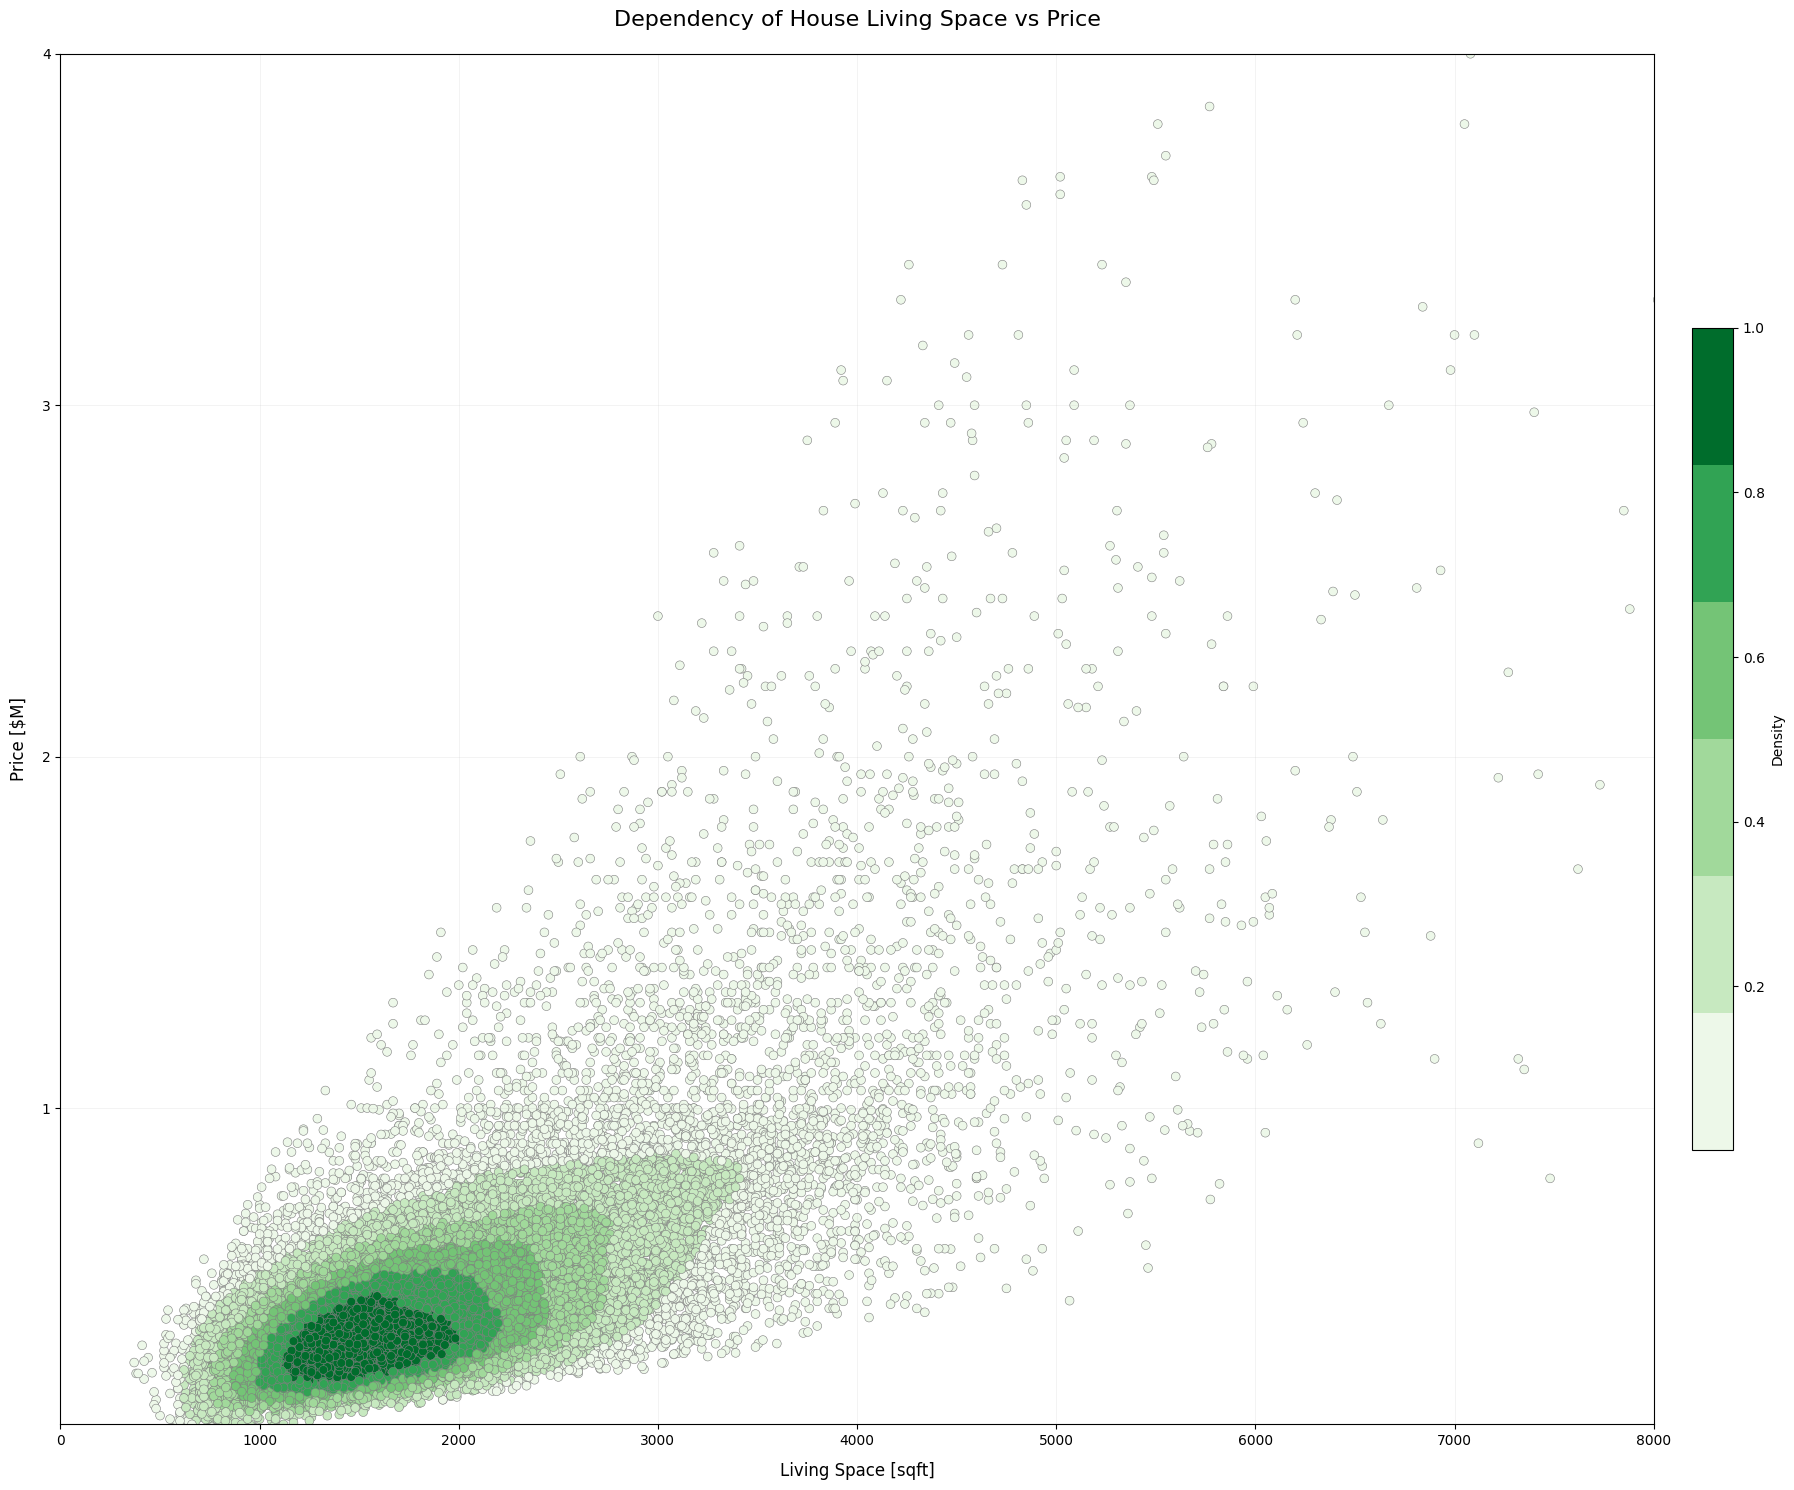

Spearman Correlation (living_sqft vs price): 0.6473


In [40]:
def plot_density_scatter(df, x_col, y_col, title, x_label, y_label, x_lim=None, y_lim=None):
    """
    Plots a density scatter plot with a Gaussian KDE-based color scale and computes Spearman correlation.

    Parameters:
    - df (DataFrame): The dataset containing the relevant columns.
    - x_col (str): Column name for the x-axis (independent variable).
    - y_col (str): Column name for the y-axis (dependent variable).
    - title (str): Title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - x_lim (tuple, optional): Limits for the x-axis (e.g., (0, 20000)).
    - y_lim (tuple, optional): Limits for the y-axis (e.g., (100000, 4000000)).
    """
 
    # Calculate density using Gaussian KDE
    kde = gaussian_kde([df[x_col], df[y_col]])
    density_values = kde(np.vstack([df[x_col], df[y_col]]))

    # Normalize density values for visualization
    density_normalized = density_values / np.max(density_values)

    # Define color scale
    green_scale = ['#edf8e9', '#c7e9c0', '#a1d99b', '#74c476', '#31a354', '#006d2c']
    cmap = ListedColormap(green_scale)

    # Create the scatter plot
    plt.figure(figsize=(20, 15))
    scatter = plt.scatter(df[x_col], df[y_col], 
                          c=density_normalized, cmap=cmap, s=40, edgecolor='gray', linewidth=0.4)

    # Format y-axis for price in millions
    def millions_formatter(x, pos):
        return f'{int(x * 1e-6)}'

    plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1e6))

    # Set plot labels and title
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(x_label, fontsize=12, labelpad=10)
    plt.ylabel(y_label, fontsize=12, labelpad=10)

    # Apply axis limits if provided
    if x_lim:
        plt.xlim(x_lim)
    if y_lim:
        plt.ylim(y_lim)

    # Add color bar
    cbar = plt.colorbar(scatter, label='Density', shrink=0.6, pad=0.02)
    cbar.ax.tick_params(labelsize=10)

    plt.grid(alpha=0.2, linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Compute Spearman correlation
    spearman_corr = df[x_col].corr(df[y_col], method='spearman')
    print(f"Spearman Correlation ({x_col} vs {y_col}): {spearman_corr:.4f}")

# Parcel Size vs. Price
plot_density_scatter(houses, 'parcel_sqft', 'price', 
                     "Dependency of House Parcel Size vs Price",
                     "Parcel size [sqft]", "Price [$M]", 
                     x_lim=(0, 80000), y_lim=(100000, 4000000))

# Living Space vs. Price
plot_density_scatter(houses, 'living_sqft', 'price', 
                     "Dependency of House Living Space vs Price",
                     "Living Space [sqft]", "Price [$M]", 
                     x_lim=(0, 8000), y_lim=(100000, 4000000))

Living space (0.6473): A correlation of 0.6473 indicates a moderate to strong positive relationship between the price and the living space of the house. This means that as the living space increases, the price of the house tends to increase as well, but not perfectly. There might still be other factors influencing the price, but living space has a stronger influence.

Parcel size (0.0778): A correlation of 0.0778 indicates a very weak positive relationship between the price and parcel size. This suggests that the size of the land (parcel size) does not significantly affect the house price compared to living space.

Conclusion:
Based on these correlations, the price value is more strongly influenced by the living space of the house than by the parcel size. Although both factors show a positive relationship with price, the correlation for living space is much stronger, indicating it's a more important determinant of price in this case.

# Hypothesis 1

## *Houses with high historical significance (built before 1940) are associated with higher prices than newly built modern houses (built after 2005), and have larger parcels (over 15 000 sqft).*


In [41]:
houses

bedrooms  bathrooms  living_sqft  parcel_sqft  floors  waterfront   
0             3       1.00       1180.0       5650.0     1.0           0  \
1             3       2.25       2570.0       7242.0     2.0           0   
2             2       1.00        770.0      10000.0     1.0           0   
3             4       3.00       1960.0       5000.0     1.0           0   
4             3       2.00       1680.0       8080.0     1.0           0   
...         ...        ...          ...          ...     ...         ...   
21592         3       2.50       1530.0       1131.0     3.0           0   
21593         4       2.50       2310.0       5813.0     2.0           0   
21594         2       0.75       1020.0       1350.0     2.0           0   
21595         3       2.50       1600.0       2388.0     2.0           0   
21596         2       0.75       1020.0       1076.0     2.0           0   

       view_quality  condition  KC_grade  sqft_above  ...  renovated  zipcode   
0                 0          3         7      1180.0  ...        0.0    98178  \
1                 0          3         7      2170.0  ...        1.0    98125   
2                 0          3         6       770.0  ...        0.0    98028   
3                 0          5         7      1050.0  ...        0.0    98136   
4                 0          3         8      1680.0  ...        0.0    98074   
...             ...        ...       ...         ...  ...        ...      ...   
21592             0          3         8      1530.0  ...        0.0    98103   
21593             0          3         8      2310.0  ...        0.0    98146   
21594             0          3         7      1020.0  ...        0.0    98144   
21595             0          3         8      1600.0  ...        0.0    98027   
21596             0          3         7      1020.0  ...        0.0    98144   

       latitude  longitude  sqft_living15  sqft_lot15       date     price   
0       47.5112   -122.257         1340.0      5650.0 2014-10-13  221900.0  \
1       47.7210   -122.319         1690.0      7639.0 2014-12-09  538000.0   
2       47.7379   -122.233         2720.0      8062.0 2015-02-25  180000.0   
3       47.5208   -122.393         1360.0      5000.0 2014-12-09  604000.0   
4       47.6168   -122.045         1800.0      7503.0 2015-02-18  510000.0   
...         ...        ...            ...         ...        ...       ...   
21592   47.6993   -122.346         1530.0      1509.0 2014-05-21  360000.0   
21593   47.5107   -122.362         1830.0      7200.0 2015-02-23  400000.0   
21594   47.5944   -122.299         1020.0      2007.0 2014-06-23  402101.0   
21595   47.5345   -122.069         1410.0      1287.0 2015-01-16  400000.0   
21596   47.5941   -122.299         1020.0      1357.0 2014-10-15  325000.0   

         house_id  age_category  
0      7129300520   Mid-century  
1      6414100192   Mid-century  
2      5631500400    Historical  
3      2487200875   Mid-century  
4      1954400510   Late-modern  
...           ...           ...  
21592   263000018        Modern  
21593  6600060120        Modern  
21594  1523300141        Modern  
21595   291310100   Late-modern  
21596  1523300157        Modern  

[20795 rows x 22 columns]

### 1.1. Historical Houses - Price Analysis

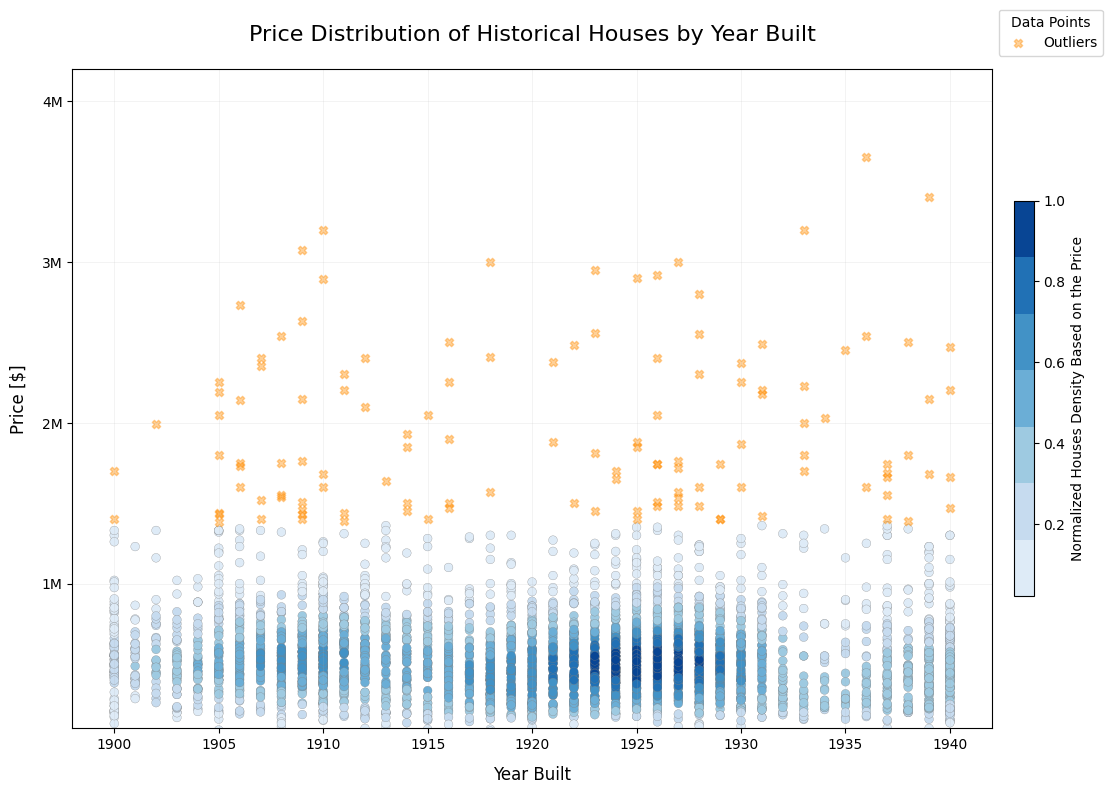

In [42]:
# Assuming you have the DataFrame 'houses' defined with 'age_category', 'built_year', and 'price'
houses_hist = houses[houses['age_category'].isin(['Historical'])]
Q1 = houses_hist['price'].quantile(0.25)
Q3 = houses_hist['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper threshold for the price of modern houses 
upper_threshold = Q3 + (2 * IQR)

# Filter outliers - set up the threshold:
hist_houses_filtered = houses_hist[houses_hist['price'] < upper_threshold]

# Calculate density using Gaussian KDE
kde = gaussian_kde([hist_houses_filtered['built_year'], hist_houses_filtered['price']])

# For density estimation, we only need the values for the filtered data
density_values = kde(np.vstack([hist_houses_filtered['built_year'], hist_houses_filtered['price']]))

# Normalize density values for visualization
density_normalized = density_values / np.max(density_values)

blue_colors = ['#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594'] 

cmap = ListedColormap(blue_colors)

# Create a scatter plot with normalized density coloring
plt.figure(figsize=(12, 8))
scatter = plt.scatter(hist_houses_filtered['built_year'], hist_houses_filtered['price'], 
                      c=density_normalized, 
                      cmap=cmap, s=40, edgecolor='gray', linewidth=0.2)  # Adjusted point size

# Adding outliers
houses_outliers = houses_hist[houses_hist['price'] > upper_threshold]
plt.scatter(houses_outliers['built_year'], houses_outliers['price'], color='darkorange', marker='X',alpha=0.4, label='Outliers')


# Y-axis formatting to display in millions (M)
def millions_formatter(x, pos):
    return f'{int(x * 1e-6)}M'

# Set intervals every 1 M
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1e6))

# Apply the formatter to the y axis using FuncFormatter (millions formatter is passed to FuncFormatter)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Plot settings
plt.title("Price Distribution of Historical Houses by Year Built", fontsize=16, pad=20)
plt.xlabel("Year Built", fontsize=12, labelpad=10)
plt.ylabel("Price [$]", fontsize=12, labelpad=10)
plt.ylim(100000, 4200000) # I set up the limit to skip the largest outlier

cbar = plt.colorbar(scatter, label='Normalized Houses Density Based on the Price', shrink=0.6, pad=0.02)  # Density bar
cbar.ax.tick_params(labelsize=10)

# Display the legend and locate it outside
plt.legend(title="Data Points", loc='upper left', bbox_to_anchor=(1, 1.1)) 

plt.tight_layout()  # Adjust layout
plt.grid(alpha=0.2, linewidth=0.5)
plt.show()

#plt.savefig("Price Distribution of Historical Houses by Year Built.jpg", format='jpg', dpi=300)


########### In this plot I skip 1 outlier - 1 property with the price over 7M

### Conclusions:

* The majority of historical houses seem to be priced under $1 million. The darkest regions in the plot indicate high density with a high concentration of houses around $500,000.

* Outliers in Price (Above $3 Million)
A few outliers - outliers indicate houses within the price range over 3 M, likely historic mansions, or homes with architectural significance.

### 1.2. Modern Houses - Price Analysis

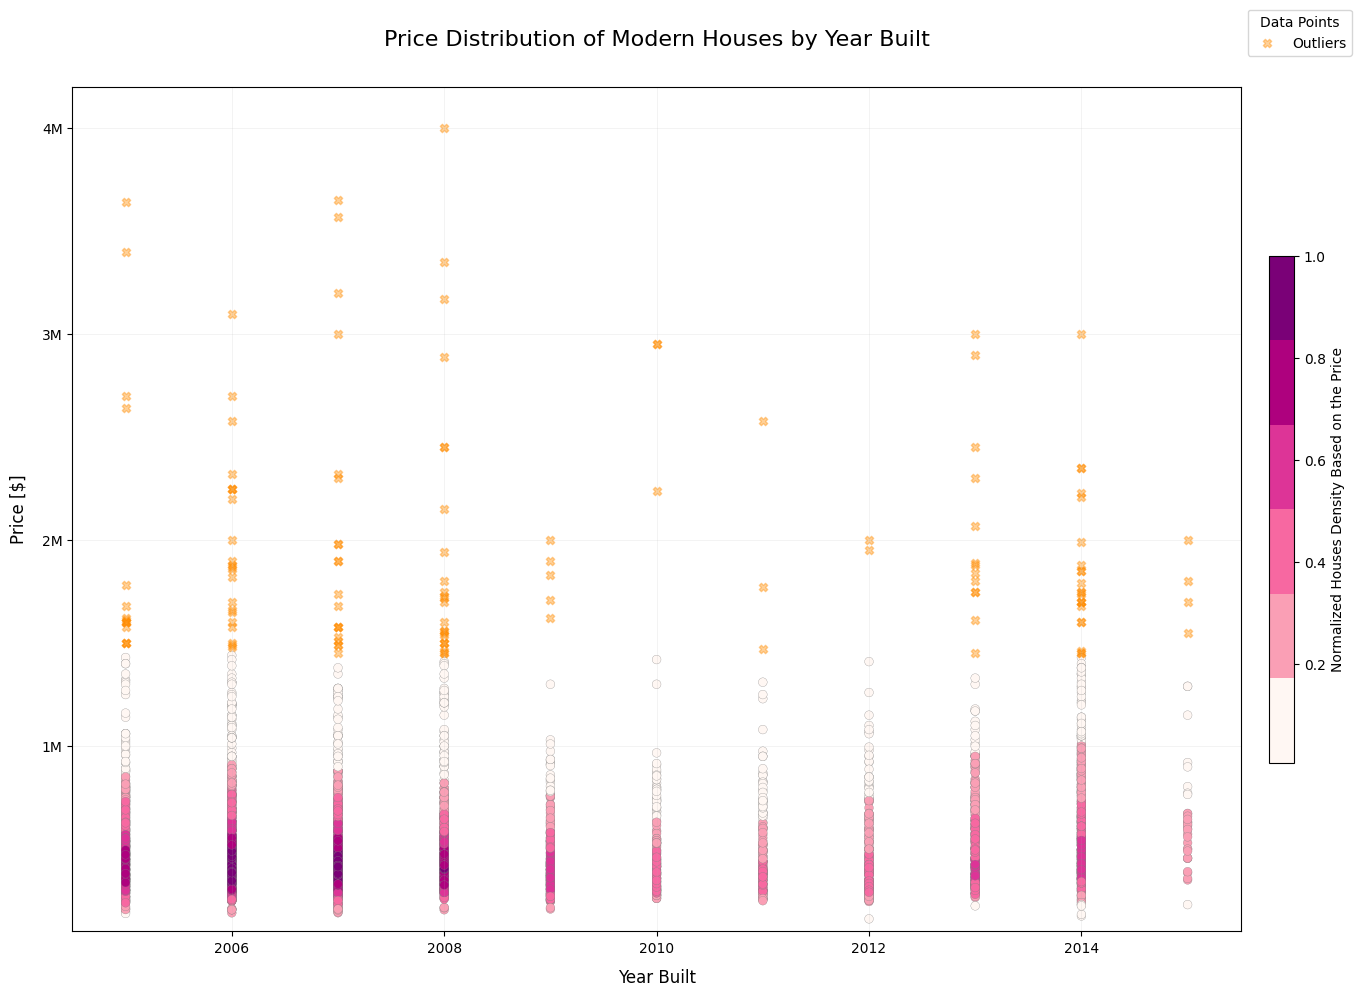

In [43]:
# Assuming you have the DataFrame 'houses' defined with 'age_category', 'built_year', and 'price'
houses_modern = houses[houses['age_category'].isin(['Modern'])]

# Filter outliers

houses_modern = houses[houses['age_category'].isin(['Modern'])]
Q1 = houses_modern['price'].quantile(0.25)
Q3 = houses_modern['price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper threshold for the price of modern houses 
upper_threshold = Q3 + (2 * IQR)
houses_filtered_modern = houses_modern[houses_modern['price'] < upper_threshold]

# Calculate density using Gaussian KDE

# Load the array
kde = gaussian_kde([houses_filtered_modern['built_year'], houses_filtered_modern['price']])

# For density estimation, we only need the values for the filtered data
density_values = kde(np.vstack([houses_filtered_modern['built_year'], houses_filtered_modern['price']]))

# Normalize density values for visualization
density_normalized = density_values / np.max(density_values)

dark2_colors = ['#fff7f3','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177']  # Extracted colors from Dark2

cmap = ListedColormap(dark2_colors)
# Create a scatter plot with normalized density coloring
plt.figure(figsize=(15,10))
scatter = plt.scatter(houses_filtered_modern['built_year'], houses_filtered_modern['price'], 
                      c=density_normalized, 
                      cmap=cmap, s=40, edgecolor='gray', linewidth=0.2)  # Adjusted point size

# Adding outliers
houses_outliers = houses_modern[houses_modern['price'] > upper_threshold]
plt.scatter(houses_outliers['built_year'], houses_outliers['price'], color='darkorange', marker='X',alpha=0.4, label='Outliers')

# Y-axis formatting to display in millions (M)
def millions_formatter(x, pos):
    return f'{int(x * 1e-6)}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1e6))

# Plot settings
plt.title("Price Distribution of Modern Houses by Year Built", fontsize=16, pad=30)
plt.xlabel("Year Built", fontsize=12, labelpad=10)
plt.ylabel("Price [$]", fontsize=12, labelpad=10)
plt.ylim(100000, 4200000)

plt.grid(alpha=0.3)

cbar = plt.colorbar(scatter, label='Normalized Houses Density Based on the Price', shrink=0.6, pad=0.02)  # Updated color bar
cbar.ax.tick_params(labelsize=10)

plt.grid(alpha=0.2, linewidth=0.5)
plt.legend(title="Data Points",loc='upper left', bbox_to_anchor=(1, 1.1))
plt.tight_layout()  # Adjust layout
plt.savefig("data\Price Distribution of Modern Houses by Year Built.jpg", format='jpg', dpi=300)
plt.show()

################ In this property I skip 1 outlier - the property with the price over 5M

The 1.5 × IQR rule was extended to 1.6 to keep wider range of houses. When using this rule for analyzing modern house prices, we identify many outliers. While the majority of data points fall within the thresholds defined by this rule (non-outliers), a significant number lie outside these thresholds. These outliers represent high-priced properties, which are important for hypothesis testing as they provide valuable insights into the characteristics of expensive homes. However, for subsequent steps, such as preparing data for modeling and price prediction, only the non-outlier data points should be included to ensure the accuracy and reliability of the models.

### Conclusions:

* Similar to historical houses, the color gradient suggests a greater density of houses around the $500k–$1 million range, but there is a stronger concentration of houses priced above $2 million in comparison to historical houses.
additionally, here we can see more outliers compared to historical houses,


* Median:  historical houses tend to have higher prices compared to modern houses.

# Parcel size analysis

### 1.3. Historical Houses Analysis Based on Parcel Size

In [44]:
# Filter outliers
houses_hist = houses[houses['age_category'].isin(['Historical'])]
Q1 = houses_hist['parcel_sqft'].quantile(0.25)
Q3 = houses_hist['parcel_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define upper threshold for the price of modern houses 
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + (2 * IQR)
print(lower_threshold, upper_threshold)

-500.0 13000.0


Lower threshold: -500.0, Upper threshold: 13000.0


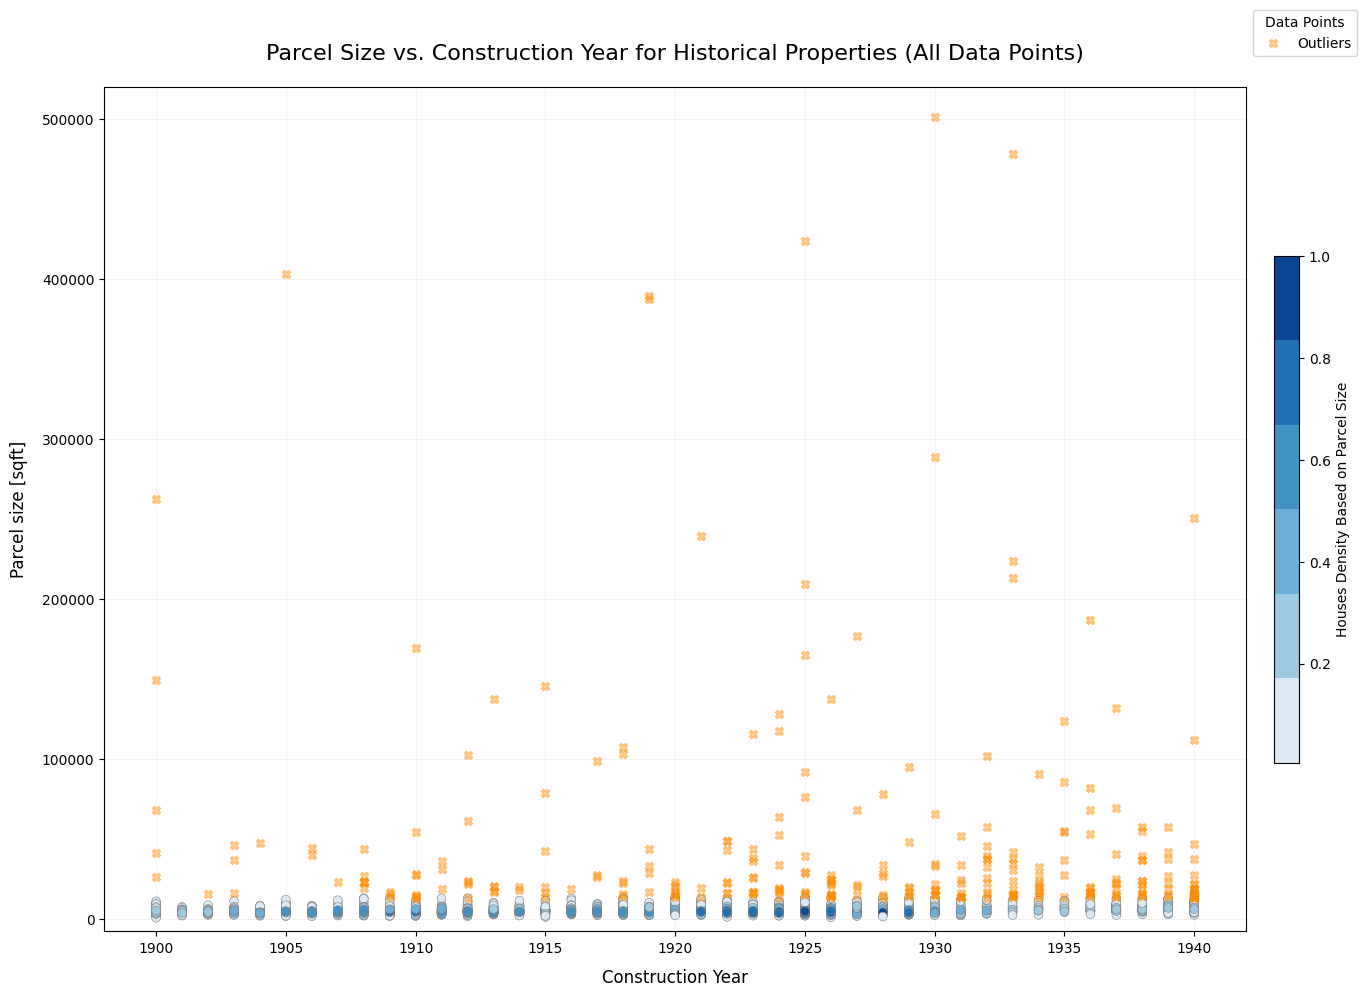

Lower threshold: -500.0, Upper threshold: 13000.0


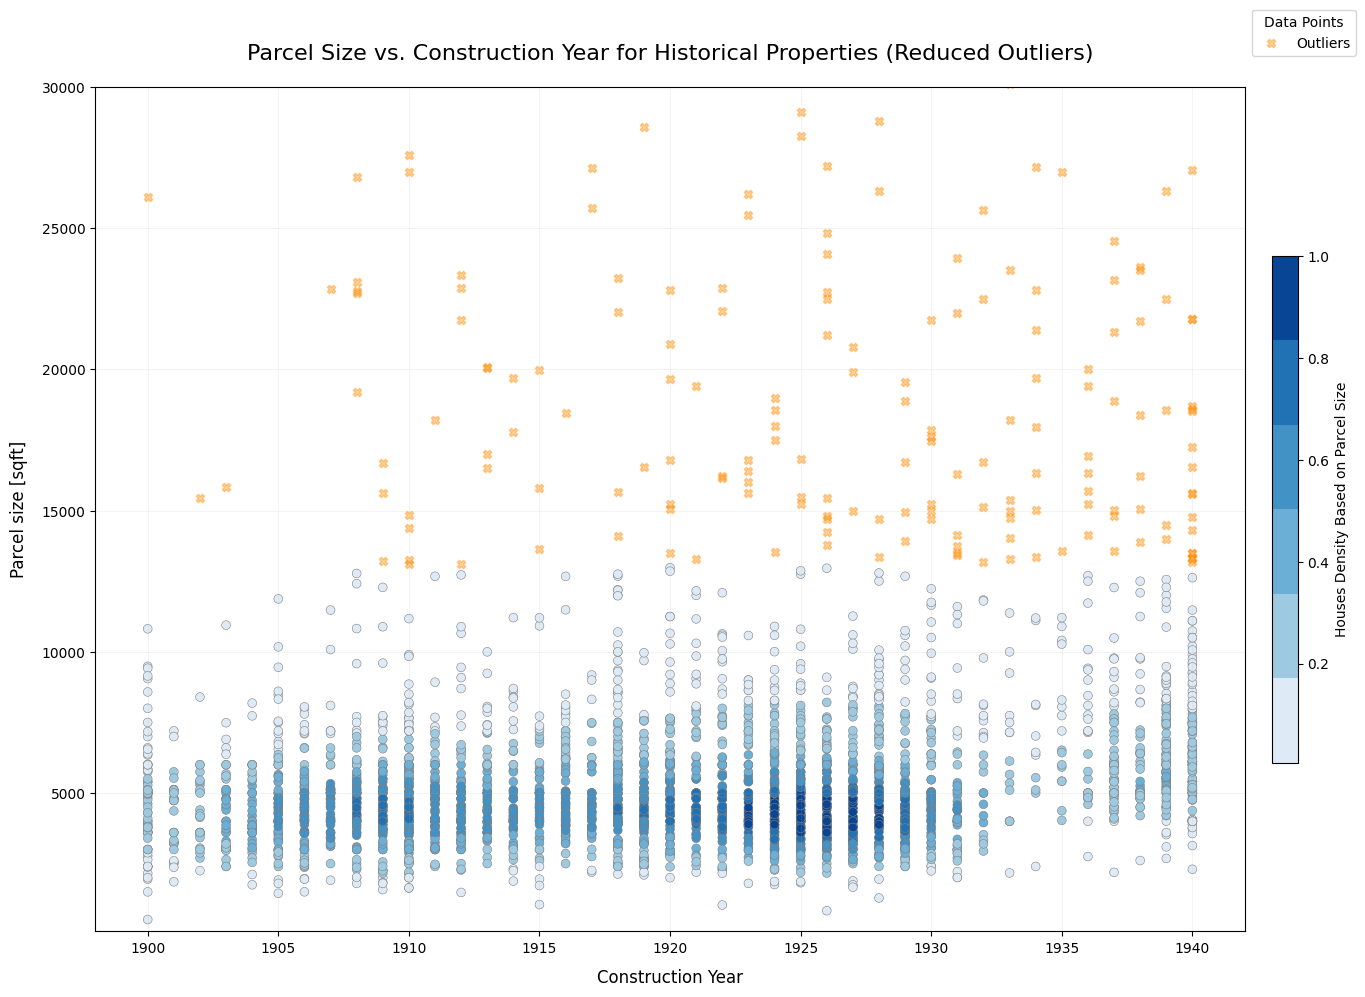

In [ ]:
def plot_parcel_vs_year(df, title, y_lim, save_as=None, color_scale='blue'):
    """
    Plots a scatter plot of parcel size vs. construction year for historical properties,
    filtering out extreme outliers using the IQR method.

    Parameters:
    - df (DataFrame): The dataset containing 'built_year' and 'parcel_sqft'.
    - title (str): Title of the plot.
    - y_lim (tuple): Limits for the y-axis (e.g., (100, 20000)).
    - save_as (str, optional): If provided, saves the figure as a .jpg file.
    - color_scale (str): Choose 'blue' or 'pink' colormap.

    Returns:
    - None
    """
    # Compute IQR for parcel size
    Q1, Q3 = df['parcel_sqft'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 2 * IQR

    print(f"Lower threshold: {lower_threshold}, Upper threshold: {upper_threshold}")

    # Split data into inliers and outliers
    houses_outliers = df[df['parcel_sqft'] > upper_threshold]
    houses_inliers = df[df['parcel_sqft'] <= upper_threshold]

    # KDE density estimation
    kde = gaussian_kde([houses_inliers['built_year'], houses_inliers['parcel_sqft']])
    density_values = kde(np.vstack([houses_inliers['built_year'], houses_inliers['parcel_sqft']]))
    density_normalized = density_values / np.max(density_values)

    # Define color scales
    color_maps = {
        'blue': ['#deebf7','#9ecae1','#6baed6','#4292c6','#2171b5','#084594'],
        'pink': ['#fff7f3','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177']
    }
    cmap = ListedColormap(color_maps[color_scale])

    # Create scatter plot
    plt.figure(figsize=(15,10))
    scatter = plt.scatter(houses_inliers['built_year'], houses_inliers['parcel_sqft'], 
                          c=density_normalized, cmap=cmap, s=40, edgecolor='gray', linewidth=0.4)

    # Plot outliers
    plt.scatter(houses_outliers['built_year'], houses_outliers['parcel_sqft'], 
                color='darkorange', marker='X', alpha=0.4, label='Outliers')

    # Plot settings
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Construction Year", fontsize=12, labelpad=10)
    plt.ylabel("Parcel size [sqft]", fontsize=12, labelpad=10)
    plt.grid(alpha=0.3)
    plt.ylim(y_lim)

    # Add color bar
    cbar = plt.colorbar(scatter, label='Houses Density Based on Parcel Size', shrink=0.6, pad=0.02)
    cbar.ax.tick_params(labelsize=10)

    plt.legend(title="Data Points",loc='upper left', bbox_to_anchor=(1, 1.1))
    plt.grid(alpha=0.2, linewidth=0.5)
    plt.tight_layout()

    # Save figure if filename is provided
    if save_as:
        plt.savefig(save_as, format='jpg', dpi=300)

    plt.show()

plot_parcel_vs_year(houses_hist, 
                    "Parcel Size vs. Construction Year for Historical Properties (All Data Points)", 
                    y_lim=(-8000, 520000), 
                    save_as="data\Parcel_Size_vs_Year_Historical_All.jpg", 
                    color_scale='blue')

plot_parcel_vs_year(houses_hist, 
                    "Parcel Size vs. Construction Year for Historical Properties (Reduced Outliers)", 
                    y_lim=(100, 30000), 
                    save_as="data\Parcel_Size_vs_Year_Historical_Reduced.jpg", 
                    color_scale='blue')


### Conclusions:

* for Historical Houses we can notice, that the highest number of houses are these with the parcels below 50,000 square feet. This suggests that most historical houses in the dataset occupy rather smaller parcels (mostly between 15,000 and 50,000 square feet).

* Also, after 1920 - we can observe a trend toward smaller parcels, possibly reflecting changes
in land use or subdivision practices.

* There are also some outliers with very large parcel sizes, especially in the range of 100,000 to 400,000 square feet. 

### 1.4. Modern Houses Analysis Based on Parcel Size

Lower threshold: -5497.5, Upper threshold: 16764.0


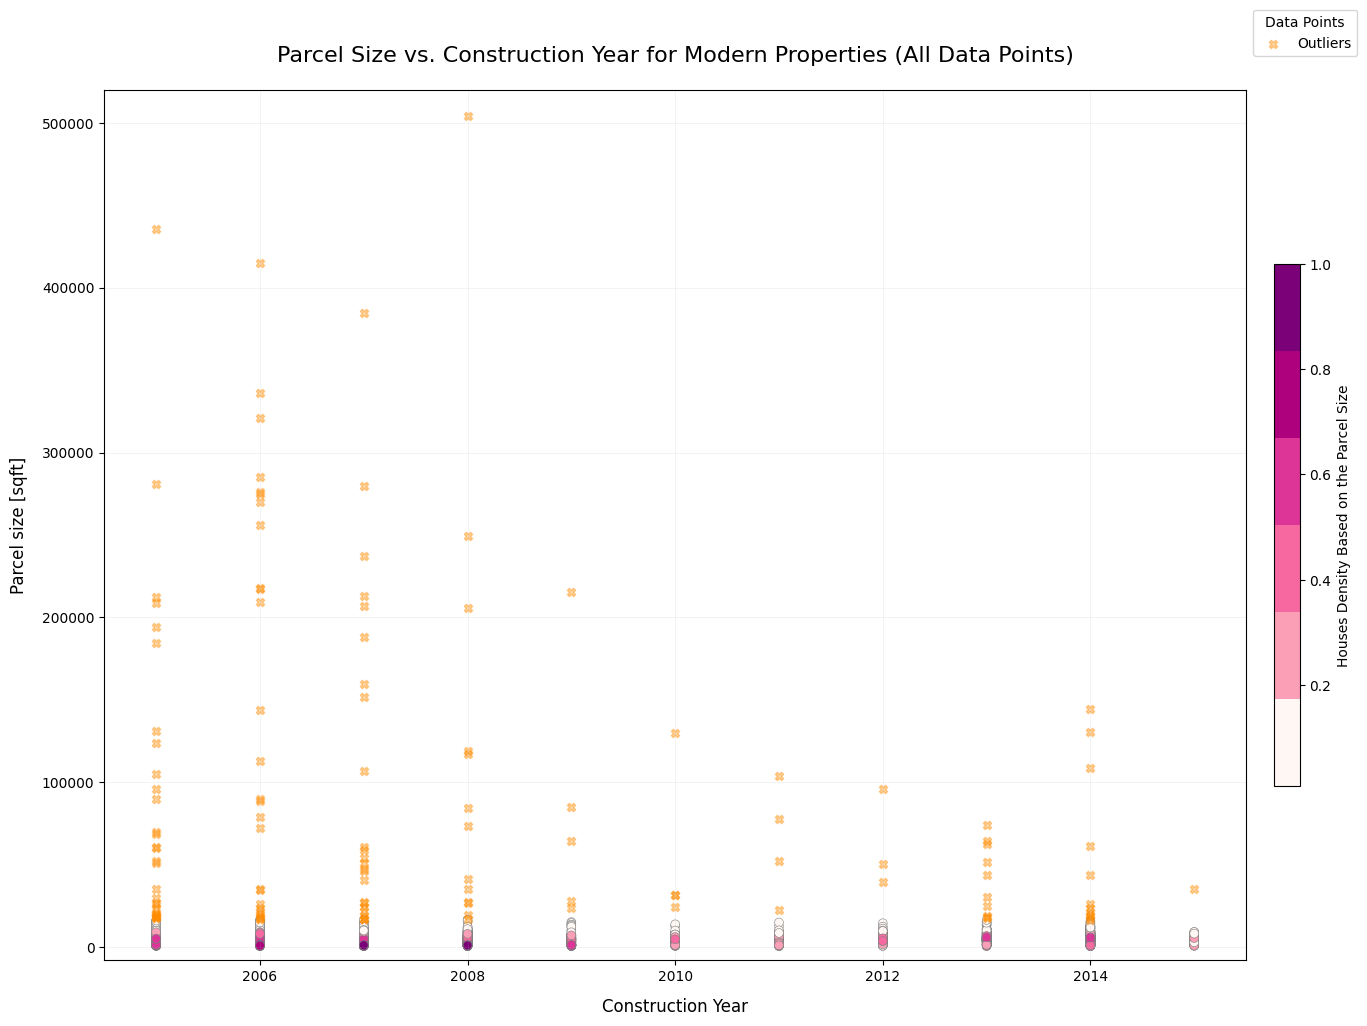

Lower threshold: -5497.5, Upper threshold: 16764.0


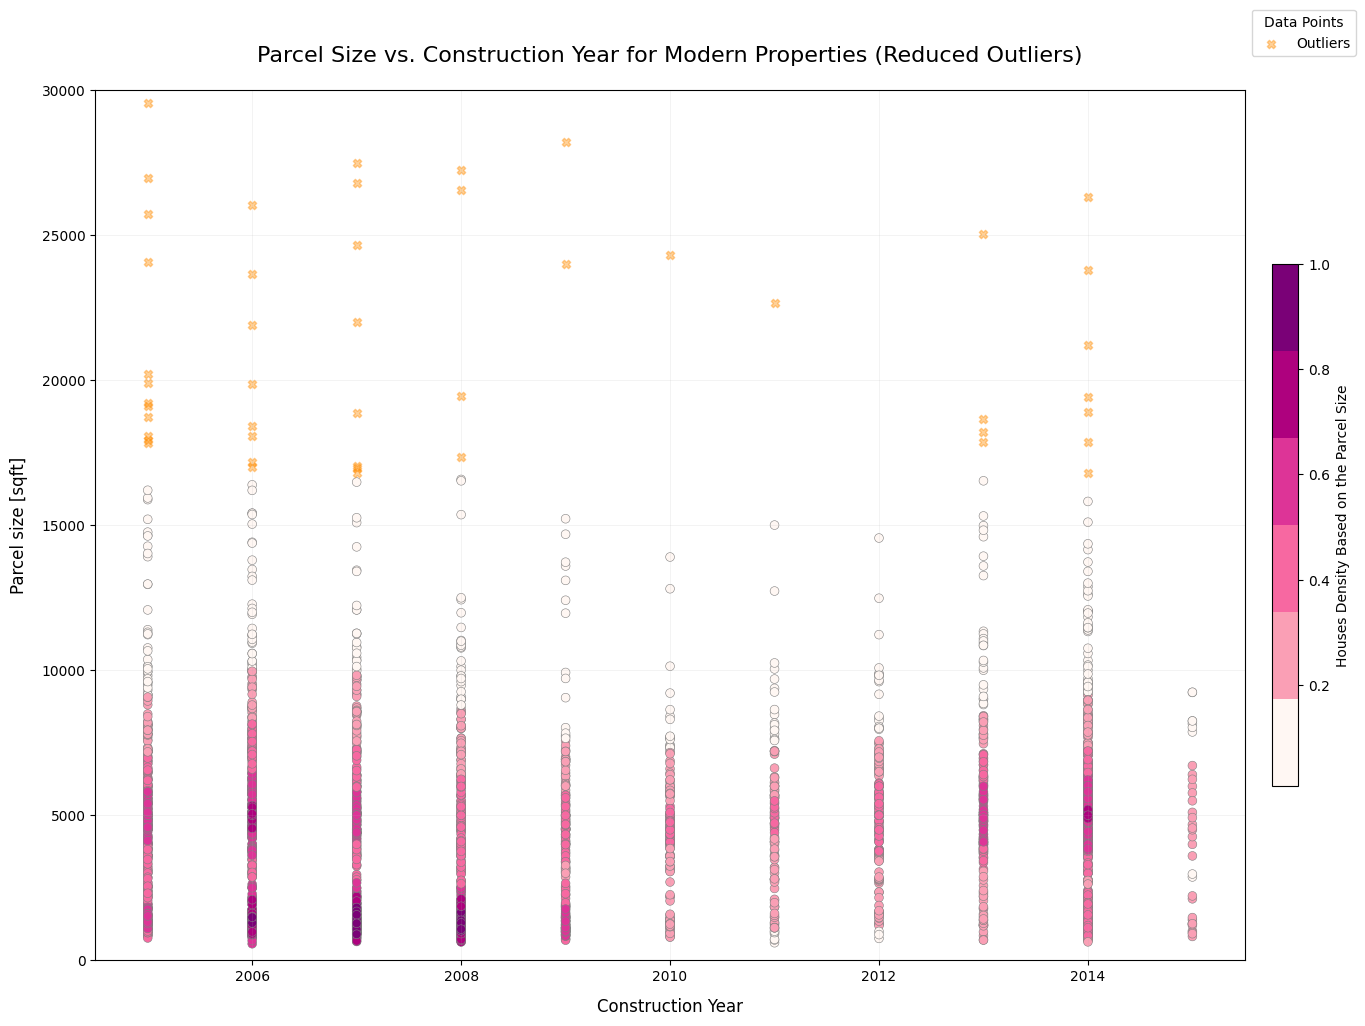

In [ ]:
def plot_parcel_vs_year(df, title, y_lim, save_as=None):
    """
    Plots a scatter plot of parcel size vs. construction year for modern properties,
    filtering out extreme outliers using the IQR method.

    Parameters:
    - df (DataFrame): The dataset containing 'built_year' and 'parcel_sqft'.
    - title (str): Title of the plot.
    - y_lim (tuple): Limits for the y-axis (e.g., (0, 30000)).
    - save_as (str, optional): If provided, saves the figure as a .jpg file.

    Returns:
    - None
    """
    # Filter modern houses
    houses_modern = df[df['age_category'].isin(['Modern'])]

    # Compute IQR for parcel size
    Q1, Q3 = houses_modern['parcel_sqft'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 2 * IQR

    print(f"Lower threshold: {lower_threshold}, Upper threshold: {upper_threshold}")

    # Split data into inliers and outliers
    houses_outliers = houses_modern[houses_modern['parcel_sqft'] > upper_threshold]
    houses_inliers = houses_modern[houses_modern['parcel_sqft'] <= upper_threshold]

    # KDE density estimation
    kde = gaussian_kde([houses_inliers['built_year'], houses_inliers['parcel_sqft']])
    density_values = kde(np.vstack([houses_inliers['built_year'], houses_inliers['parcel_sqft']]))
    density_normalized = density_values / np.max(density_values)

    # Define color scale
    pink_scale = ListedColormap(['#fff7f3','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177'])

    # Create scatter plot
    plt.figure(figsize=(15,10))
    scatter = plt.scatter(houses_inliers['built_year'], houses_inliers['parcel_sqft'], 
                          c=density_normalized, cmap=pink_scale, s=40, edgecolor='gray', linewidth=0.4)

    # Plot outliers
    plt.scatter(houses_outliers['built_year'], houses_outliers['parcel_sqft'], 
                color='darkorange', marker='X', alpha=0.4, label='Outliers')

    # Plot settings
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel("Construction Year", fontsize=12, labelpad=10)
    plt.ylabel("Parcel size [sqft]", fontsize=12, labelpad=10)
    plt.grid(alpha=0.3)
    plt.ylim(y_lim)

    # Add color bar
    cbar = plt.colorbar(scatter, label='Houses Density Based on the Parcel Size', shrink=0.6, pad=0.02)
    cbar.ax.tick_params(labelsize=10)

    plt.grid(alpha=0.2, linewidth=0.5)
    plt.tight_layout()
    plt.legend(title="Data Points",loc='upper left', bbox_to_anchor=(1, 1.1))

    # Save figure if filename is provided
    if save_as:
        plt.savefig(save_as, format='jpg', dpi=300)

    plt.show()

plot_parcel_vs_year(houses, 
                    "Parcel Size vs. Construction Year for Modern Properties (All Data Points)", 
                    y_lim=(-8000, 520000), 
                    save_as="data\Parcel_Size_vs_Year_All.jpg")

plot_parcel_vs_year(houses, 
                    "Parcel Size vs. Construction Year for Modern Properties (Reduced Outliers)", 
                    y_lim=(0, 30000), 
                    save_as="data\Parcel_Size_vs_Year_Reduced.jpg")


### Conclusions:
* When analyzing the data for Modern Houses - here the density shows higher concentrations of properties with parcel sizes between 50,000 and 100,000 sqft, with also a high concentration of houses with a larger parcel size 100-200 000 square feet for houses built between 2004 and 2008.

* After 2008, there is however a noticeable decline in the number of properties with large parcel sizes.

## Conclusionf for the hypothesis 1:

### *The hypothesis is partially true - Houses with high historical significance (built before 1940) are associated with higher prices, however in terms of the parcel size, Modern houses tend to have much larger parcels.*


_________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Hypothesis 2 
## *Houses with four or more bathrooms are mostly modern (built post-2005), and include luxury amenities specified by: King County Garde, Condition Scale, Waterfront, View Quality.*

### Which houses based on age category contain more than 4 bathrooms

In [47]:
four_bath = houses[houses['bathrooms'] > 4].groupby('age_category').bathrooms.count()
four_bath

age_category
Historical      25
Late-modern    131
Mid-century     24
Modern          81
Name: bathrooms, dtype: int64

Mostly late-modern and modern houses have 4+ bathrooms

In [48]:
house_cat = houses.groupby('age_category').bathrooms.count()


In [49]:
Hist = four_bath/house_cat *100
Hist

age_category
Historical     0.784929
Late-modern    1.629759
Mid-century    0.361500
Modern         2.761677
Name: bathrooms, dtype: float64

### Analyze the quality of view for each age category

In [50]:
houses.groupby('age_category').view_quality.value_counts()

age_category  view_quality
Historical    0               2767
              2                204
              3                101
              4                 60
              1                 53
Late-modern   0               7316
              2                332
              3                186
              4                121
              1                 83
Mid-century   0               5908
              2                312
              1                155
              3                152
              4                112
Modern        0               2732
              2                 92
              3                 59
              1                 31
              4                 19
Name: count, dtype: int64

### Analyze properties with 4+ bathrooms

In [51]:
# KC grade analysis based on the number of bathrooms for properties with 4+ bathrooms
houses[houses['bathrooms']>4].KC_grade.value_counts()

KC_grade
11    82
10    71
12    31
9     27
8     25
7     16
13     9
Name: count, dtype: int64

All houses with 4+ bathrooms have a KC grade over the average, with most of them in the range of 10-12.

In [52]:
# View quality analysis 
houses[houses['bathrooms']>4].view_quality.value_counts()

view_quality
0    154
2     35
3     32
4     31
1      9
Name: count, dtype: Int64

Most of the houses with 4+ bathrooms have a poor quality of the view

In [53]:
houses[houses['bathrooms']>4].condition.value_counts()

condition
3    209
4     38
5     14
Name: count, dtype: int64

Condition of majority of those houses is average - 3 in a 5 digit scale. 

In [54]:
houses[houses['bathrooms']>4].waterfront.value_counts()

waterfront
0    244
1     17
Name: count, dtype: int64

In [55]:
bath=houses[houses['bathrooms']>4]
bath[bath['KC_grade']>9].groupby('age_category').view_quality.value_counts()

age_category  view_quality
Historical    2                6
              0                5
              4                2
              1                1
              3                1
Late-modern   0               54
              4               18
              2               15
              3               14
              1                2
Mid-century   0                2
              2                2
              3                2
              4                2
Modern        0               43
              2                9
              3                7
              4                5
              1                3
Name: count, dtype: int64

### 2.1. The analysis of Data for houses with 4+ Bathrooms for KC grade 

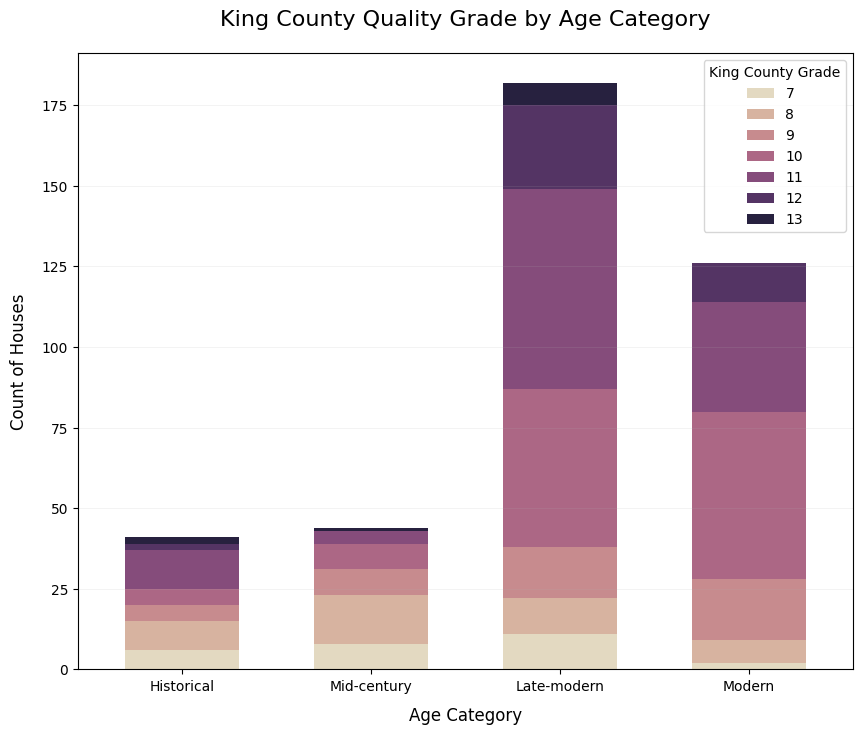

In [ ]:
light_pink =sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
# Group data by age category, view quality, and KC grade
luxury_counts = houses[houses['bathrooms'] >= 4].groupby(['age_category', 'KC_grade']).size().unstack(fill_value=0)

# Redefine the order of age categories
category_order = ["Historical", "Mid-century", "Late-modern", "Modern"]
luxury_counts = luxury_counts.reindex(category_order)

# Stacked bar plot
luxury_counts.plot(kind='bar', width=0.6, stacked=True, colormap=light_pink, figsize=(10, 8))
plt.title("King County Quality Grade by Age Category", fontsize=16, pad=20)

#plt.subplots_adjust(left=0.3, right=0.95, bottom=0.2, top=0.9)

plt.xlabel("Age Category", fontsize=12 ,labelpad=10)
plt.xticks(rotation=0, fontsize=10)
plt.ylabel("Count of Houses", fontsize=12 ,labelpad=10)
plt.legend(title="King County Grade")
plt.grid(axis='y', alpha=0.2, linewidth=0.5)

plt.savefig("data\KC_Quality_Grade_by_Age_Category_4+_Bathrooms.jpg", format='jpg', dpi=300)
plt.show()

This group of houses is described by KC grade range of 7-13, with most homes scoring between 9 and 11. This suggests that these homes are generally of higher quality, aligning with the expectation that homes with more bathrooms often feature more upscale amenities and construction quality.

### 2.2. Condition of houses with 4+ bathrooms, depending on age category


In [57]:
houses.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

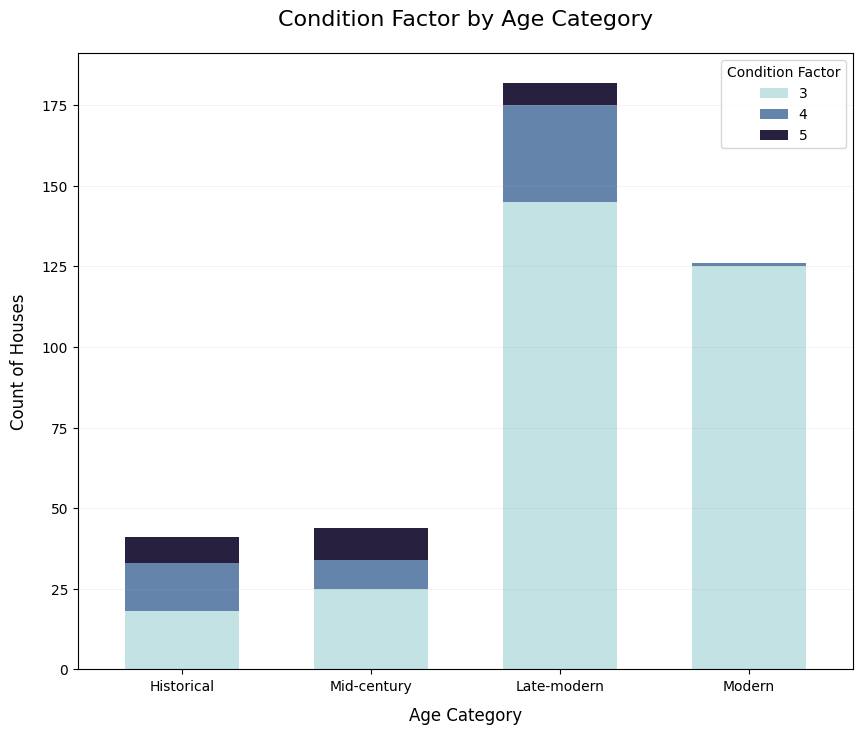

In [ ]:
dark2_colors = ['#fee391', '#fe9929', '#fc4e2a'] 
cmap2 = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

# Group data by age category, view quality, and KC grade
condition_counts = houses[houses['bathrooms'] >= 4].groupby(['age_category', 'condition']).size().unstack(fill_value=0)

# Redefine the order of age categories
category_order = ["Historical", "Mid-century", "Late-modern", "Modern"]
condition_counts = condition_counts.reindex(category_order)

# Stacked bar plot
condition_counts.plot(kind='bar', width=0.6, stacked=True, colormap=cmap2, figsize=(10, 8))
plt.title("Condition Factor by Age Category", fontsize=16, pad=20)
plt.xlabel("Age Category", fontsize=12 ,labelpad=10)
plt.xticks(rotation=0, fontsize=10)

plt.ylabel("Count of Houses", fontsize=12 ,labelpad=10)
plt.legend(title="Condition Factor")
plt.grid(axis='y', alpha=0.2, linewidth=0.5)

plt.savefig("data\Condition_by_Age_Category_4+_Bathrooms.jpg", format='jpg', dpi=300)
plt.show()

When looking at the condition ratings (from 1 to 5), the data shows that houses with 4+ bathrooms mostly fall within the mid-to-high condition range of 3 to 5, with a significant portion rated 3.

### 2.3. Heatmap Analysis - How KC Grade Depends On the Condition Factor

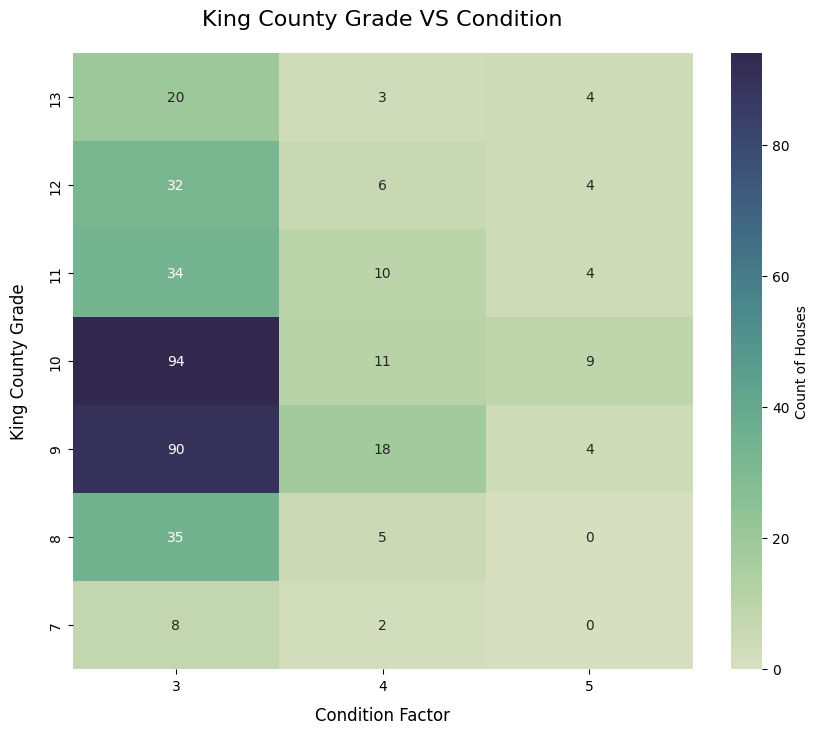

In [ ]:
# Create pivot table for heatmap
heatmap_data = houses[houses['bathrooms'] >= 4].groupby(['KC_grade', 'condition']).size().unstack(fill_value=0)

# Plot heatmap : annot: if true write the values inside the cell; fmt - string formatting code,
# center(says to what value the colormap should be centered, cbar_kws its a dict for value mapping, 
# optionally cbar boolean wheather to draw a colorbar)

cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    annot=True,          # Annotate cells with their values
    fmt="d",             # Format of the annotation text
    cmap=cmap,           # Use the cubehelix colormap
    center=50,           # Center the colormap (adjust based on data)
    cbar_kws={'label': 'Count of Houses'},
    yticklabels=heatmap_data.index[::-1]
)

# Title and axis labels
plt.title("King County Grade VS Condition", fontsize=16, pad=20)
plt.xlabel("Condition Factor", fontsize=12, labelpad=10)
plt.ylabel("King County Grade", fontsize=12, labelpad=15)

plt.savefig("data\KC_Grade_VS_Condition.jpg", format='jpg', dpi=300)

# Show the plot
#plt.tight_layout()  # Automatically adjusts subplot parameters to give specified padding
plt.show()

### 2.4. Waterfront & View Quality Analysis

In [60]:
waterfront = houses[houses['bathrooms'] >= 4].waterfront.value_counts()
waterfront

waterfront
0    371
1     22
Name: count, dtype: int64

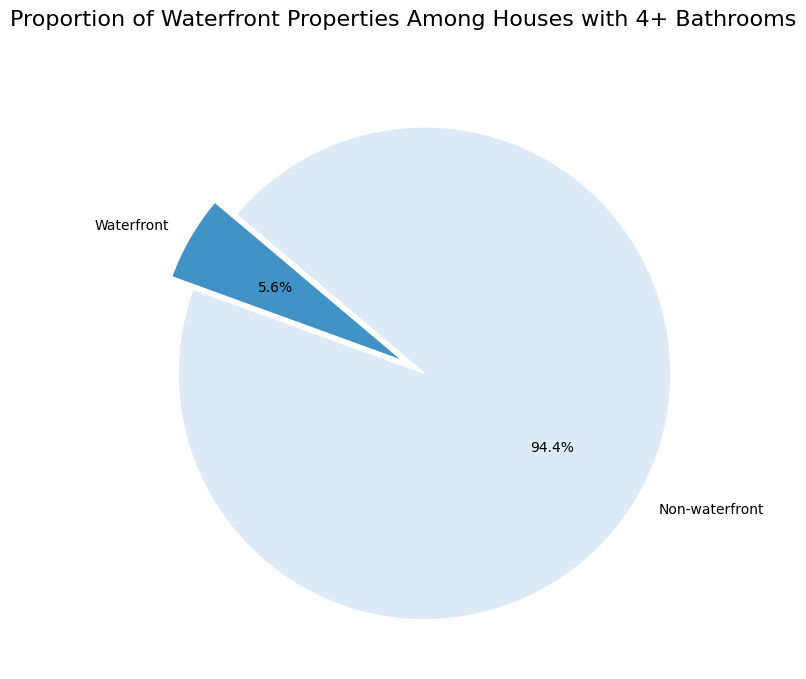

In [61]:
# Plotting a pie chart for the waterfront
dark2_colors = ['#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#084594'] 

plt.figure(figsize=(10, 8))
plt.pie(
    waterfront, 
    labels=['Non-waterfront' if x == 0 else 'Waterfront' for x in waterfront.index ],  # Use the index (e.g., 1 for waterfront, 0 for non-waterfront)
    autopct='%1.1f%%',        # Display percentages of each category
    startangle=160,           # Add an angle for better layout
    colors=['#deebf7', '#4292c6'],  # Colors for waterfront and non-waterfront categories
    wedgeprops={'edgecolor': 'white'},  # Optional: adds a black edge around slices
    explode=(0.1,0),
    
)
plt.title("Proportion of Waterfront Properties Among Houses with 4+ Bathrooms", fontsize=16, pad=20)

plt.savefig("data\Waterfromt_4+_bathroom_houses.jpg", format='jpg', dpi=300)
plt.show()

In [62]:
view = houses[houses['bathrooms'] >= 4].view_quality.value_counts()
view

view_quality
0    252
2     49
3     41
4     38
1     13
Name: count, dtype: Int64

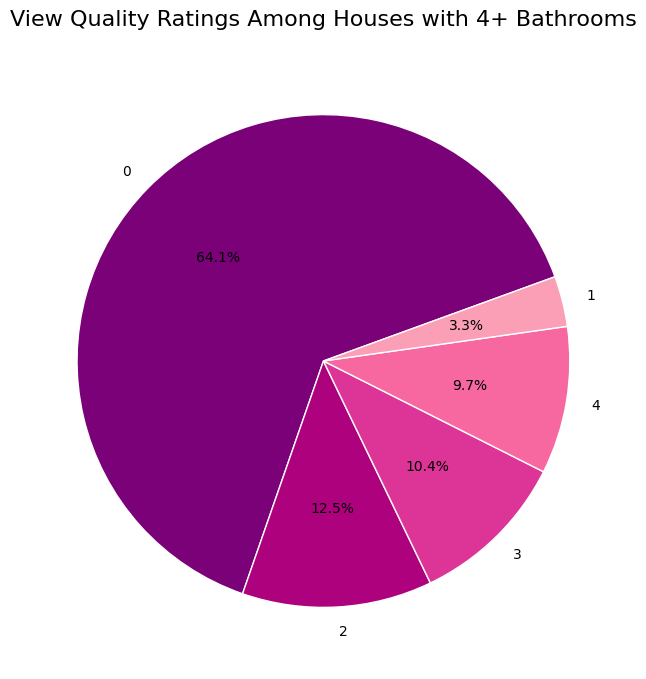

In [63]:
# Plotting a pie chart for the view quality

dark2_colors = reversed(['#fff7f3','#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177'])

plt.figure(figsize=(10, 8))
plt.pie(
    view, 
    labels=view.index,
    autopct='%1.1f%%',        # Display percentages of each category
    startangle=20,           # The angle by which the start of the pie is rotated, counterclockwise from the x-axis.
    colors=dark2_colors,  # Colors for waterfront and non-waterfront categories
    wedgeprops={'edgecolor': 'white'}  # Optional: adds a black edge around slices
    
)

plt.title("View Quality Ratings Among Houses with 4+ Bathrooms", fontsize=16, pad=20)

plt.savefig("data\View_Quality_Rating.jpg", format='jpg', dpi=300)
plt.show()


In [64]:
houses.groupby('waterfront')['view_quality'].value_counts()

waterfront  view_quality
0           0               18722
            2                 933
            3                 485
            1                 321
            4                 190
1           4                 122
            3                  13
            2                   7
            0                   1
            1                   1
Name: count, dtype: int64

### Conclusion:
* Analysis of the waterfront and view quality for this group of houses shows that majority of them do not have a waterfront, additionally what surprised me even more, most of them have a view quality of 0.

## Conclusionf for the hypothesis 2:

The analysis of the data confirms part of this hypothesis :

* The majority of houses with four or more bathrooms fall into the late-modern and modern categories, 
* Houses with 4+ bathrooms generally have higher KC grades, 
* Both the condition of these houses and the view are rather poor.


________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# Hypothesis 3
## *Homes with a high grade of King County grading system are located in areas with beautiful views, near facilities like golf courses.*

## Calculate the distances to the nearest golf club

Adding the Data Frame with locations of top golf courses in King County:

In [65]:
# Adding the Data Frame with locations of top golf courses in King County:

golf_courses_data = {'name':['Maplewood Golf Course', 'The Golf Club at Newcastle', 'Auburn Golf Course', 'Mount Si Golf Course', 'Interbay Golf Center',
                             "Druid's Glen Golf Club", "Glen Acres Golf & Country Club", 'Sand Point Country Club', 'Foster Golf Links'], 
                     'latitude':['47.4719', '47.5356', '47.3362', '47.5192', '47.6438', '47.3326', '47.5040','47.6888', '47.48132'], 
                     'longitude':['-122.157', '-122.143', '-122.2066', '-121.797', '-122.378', '-122.066', '-122.319', '-122.269', '-122.265'], 
                     'zipcode':['98058', '98059', '98092', '98065', '98119', '98042', '98168','98115','98168']}
golf_courses = pd.DataFrame(golf_courses_data)

The great_circle function imported from the geopy.distance module is specifically designed to calculate distances between two latitude-longitude coordinates on a spherical model of the Earth, and it automatically handles the calculations internally.

In [66]:
# Function to calculate the nearest golf course for each house in the DataFrame
def calculate_nearest_golf_course(houses_df, golf_courses_df):

    # Apply the nearest_golf_course function to each house's latitude and longitude
    houses_df['distance_to_nearest_golf_course'] = houses_df.apply(
        lambda house: nearest_golf_course(house['latitude'], house['longitude'], golf_courses_df),
        axis=1
    )
    return houses_df


# Individual distance calculation function using great_circle
def nearest_golf_course(house_lat, house_lon, golf_courses_df):
    house_location = (house_lat, house_lon)

    # Calculate distances from the house to each golf course - for each golf course apply the great circle function - 
    # take the latitude and longitude of the golf course and calculate the distance from the house locatiion, return 
    # the smallest value

    distances = golf_courses_df.apply(
        lambda x: great_circle(house_location, (x['latitude'], x['longitude'])).miles,
        axis=1
    )
    
    # Return the minimum distance (closest golf course)
    return distances.min()

# Calling the function:
houses_with_distances = calculate_nearest_golf_course(houses, golf_courses)

### 1.1. Analysis of 'distances to the closest golf course' based on the Waterfront and Non_Waterfront Locations

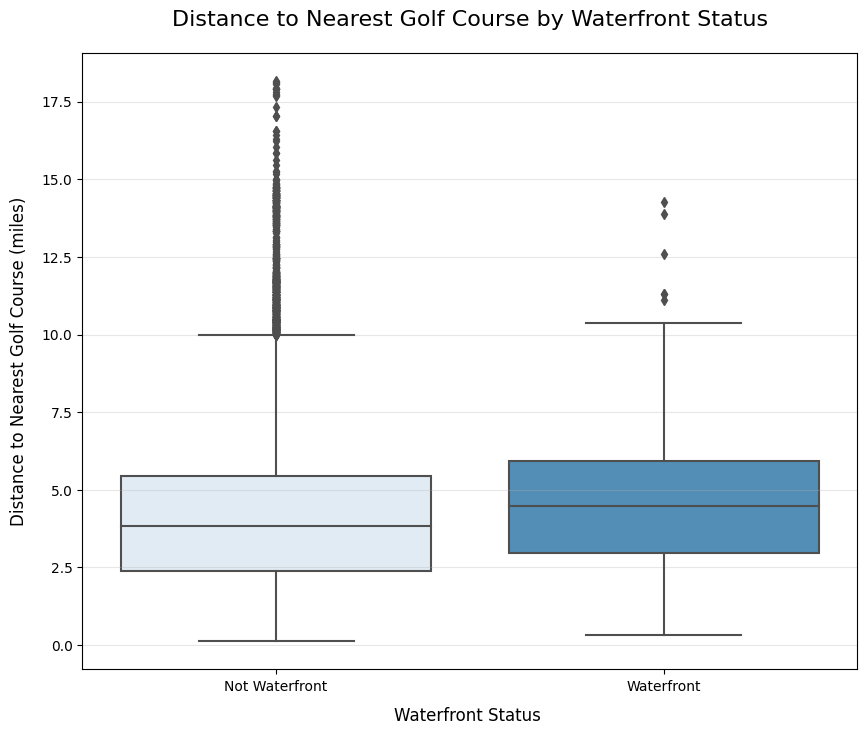

In [67]:
# Set up the figure
plt.figure(figsize=(10, 8))

# Create a box plot or violin plot showing distance to nearest golf course by waterfront status
sns.boxplot(
    data=houses,
    x='waterfront',
    y='distance_to_nearest_golf_course',
    palette=['#deebf7', '#4292c6']  # Color scheme for non-waterfront and waterfront
)

# Customize plot aesthetics
plt.title("Distance to Nearest Golf Course by Waterfront Status", fontsize=16, pad=20)
plt.xlabel("Waterfront Status ", fontsize=12, labelpad=10)
plt.ylabel("Distance to Nearest Golf Course (miles)", fontsize=12, labelpad=10)
plt.xticks([0, 1], ["Not Waterfront", "Waterfront"], fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.show()

### 1.2. King County Grade Value VS the Distance to the Nearest Golf Club & View Quality

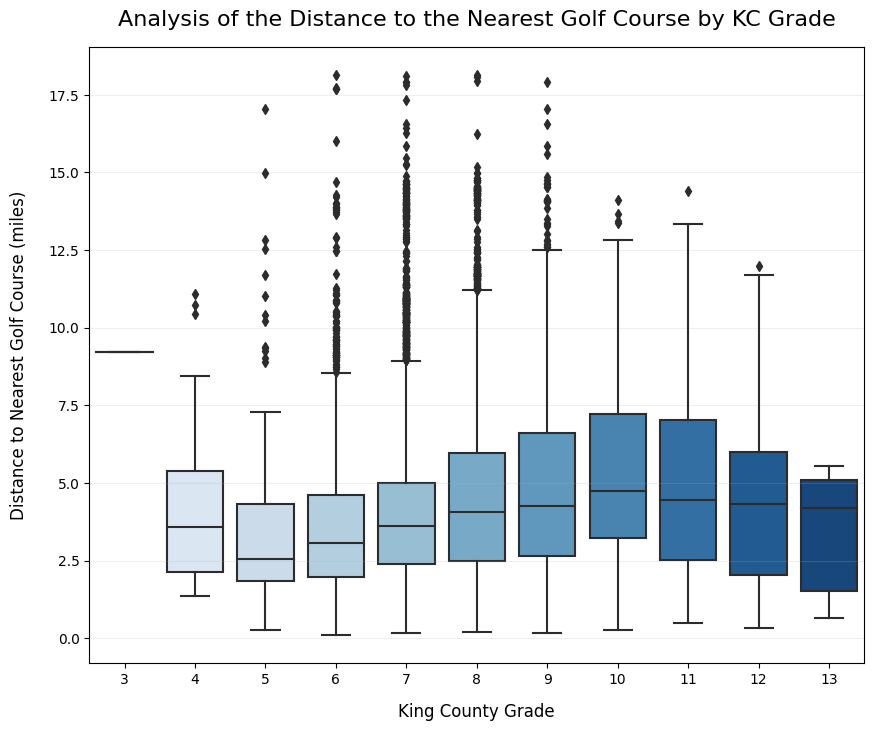

C:\Users\Marcelina\AppData\Local\Temp\ipykernel_21256\3573193808.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=houses, x='KC_grade', y='view_quality', palette='Blues', capsize=0.1, ci="sd")


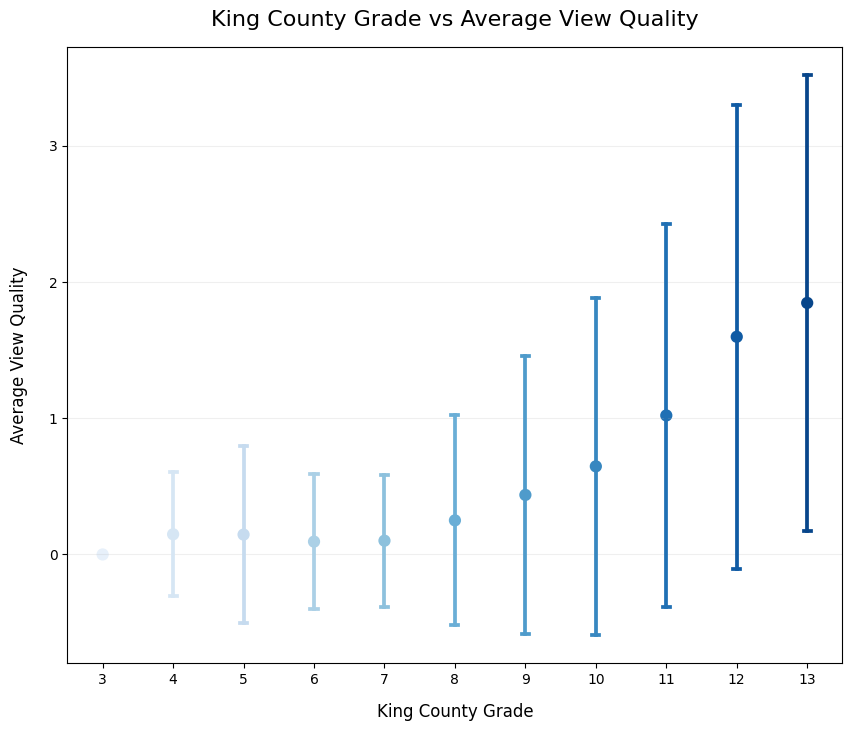

In [ ]:
# Assuming 'houses' is your dataframe with 'KC_grade' and 'distance_to_golf' columns
plt.figure(figsize=(10, 8))

# Box Plot
sns.boxplot(data=houses, x='KC_grade', y='distance_to_nearest_golf_course', palette='Blues')
plt.title("Analysis of the Distance to the Nearest Golf Course by KC Grade", fontsize=16, pad=15)
plt.xlabel("King County Grade", fontsize=12, labelpad=12)
plt.ylabel("Distance to Nearest Golf Course (miles)", fontsize=12, labelpad=15)
plt.grid(axis='y', alpha=0.2)
plt.savefig("data\Distance_to Golf_Course_VS_KC_Grade.jpg", format='jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 8))
sns.pointplot(data=houses, x='KC_grade', y='view_quality', palette='Blues', capsize=0.1, ci="sd")
plt.title("King County Grade vs Average View Quality", fontsize=16, pad=15)
plt.xlabel("King County Grade", fontsize=12, labelpad=12)
plt.ylabel("Average View Quality", fontsize=12, labelpad=15)
plt.grid(axis='y', alpha=0.2)
plt.savefig("data\View_Quality_VS KC_Grade.jpg", format='jpg', dpi=300)
plt.show()

* Lower-grade properties (3-6) generally show smaller variability in their distance to golf club, with only fewer extreme outliers,

* As the grade increases, particularly from 7 to 9, there’s more spread in the distances, indicating that middle-grade properties are located both close to and far from golf clubs.

* Properties with grades closer to 10 and above tend to have a broader range of distances from golf courses, with medians that appear to increase slightly, meaning these homes may be farther on average from golf courses.

* With increasing scale of King County grade, the view quality is getting better, there is definitely more houses with a better view for top graded houses, however some of them still seem to have also worse quality of view


In [69]:
houses_KC_high_grade = houses[houses['KC_grade'].between(10,13)]


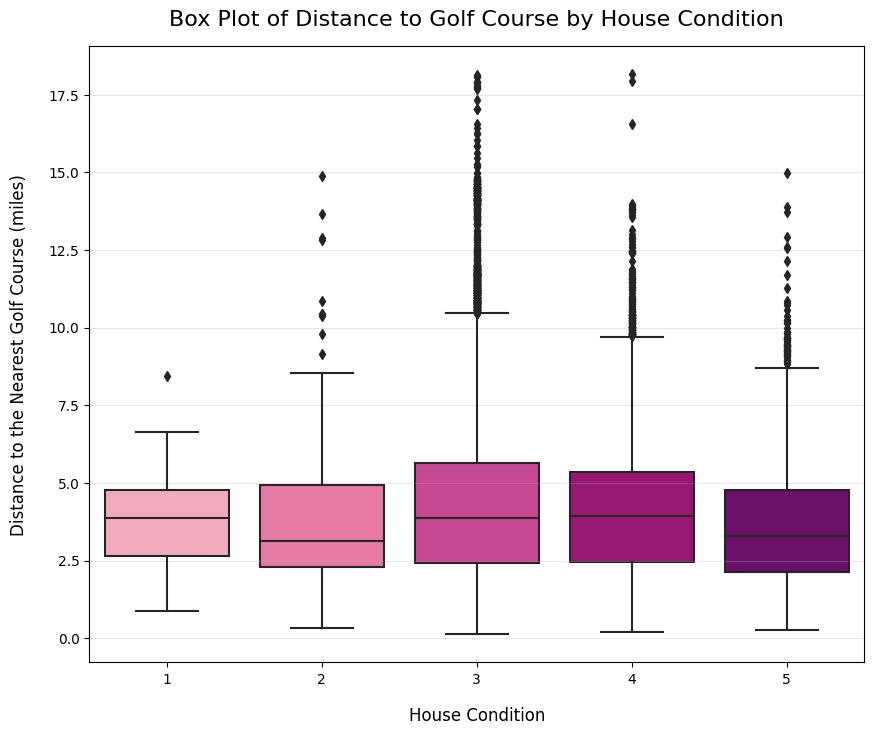

In [70]:

# Assuming 'houses' is your dataframe with 'KC_grade' and 'distance_to_golf' columns
plt.figure(figsize=(10, 8))

# Box Plot

pink_colors = ['#fa9fb5','#f768a1','#dd3497','#ae017e','#7a0177']  # Extracted colors from Dark2

sns.boxplot(data=houses, x='condition', y='distance_to_nearest_golf_course', palette=pink_colors)
plt.title("Box Plot of Distance to Golf Course by House Condition", pad=15, fontsize=16)
plt.xlabel("House Condition", fontsize=12, labelpad=15)
plt.ylabel("Distance to the Nearest Golf Course (miles)", fontsize=12, labelpad=15)
plt.grid(axis='y', alpha=0.3)


C:\Users\Marcelina\AppData\Local\Temp\ipykernel_21256\950647438.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=houses, x='KC_grade', y='condition', palette='Blues', capsize=0.1, ci="sd")


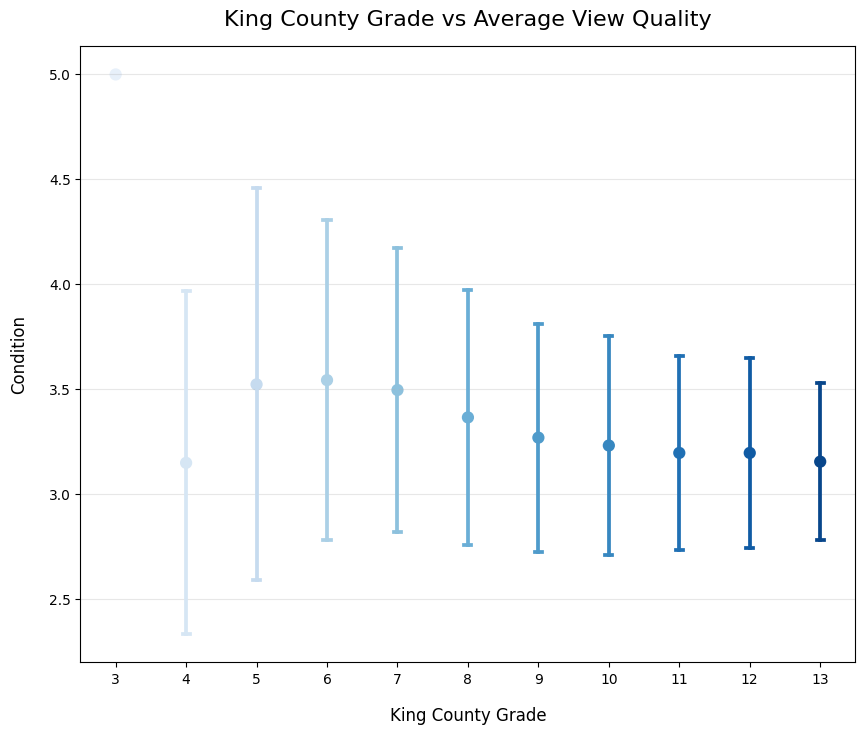

In [71]:
plt.figure(figsize=(10, 8))
sns.pointplot(data=houses, x='KC_grade', y='condition', palette='Blues', capsize=0.1, ci="sd")
plt.title("King County Grade vs Average View Quality", fontsize=16, pad=15)
plt.xlabel("King County Grade", fontsize=12, labelpad=15)
plt.ylabel("Condition", fontsize=12, labelpad=15)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Filter historical houses (built after 1940) with more than 4 bathrooms & no waterfront, with parcel size at least 15000 sqft, subtracting living area



The average tennis court is around 8000 sqft, and the medium size swimming pool is 800 sqft. 

Ideally, to allow flexibility in design and space for other structures, a parcel closer to 15,000 
square feet or larger is recommended.

In [72]:
golf_courses_data = {'name':['Maplewood Golf Course', 'The Golf Club at Newcastle', 'Auburn Golf Course', 'Mount Si Golf Course', 'Interbay Golf Center',
                             "Druid's Glen Golf Club", "Glen Acres Golf & Country Club", 'Sand Point Country Club', 'Foster Golf Links'], 
                     'latitude':['47.4719', '47.5356', '47.3362', '47.5192', '47.6438', '47.3326', '47.5040','47.6888', '47.48132'], 
                     'longitude':['-122.157', '-122.143', '-122.2066', '-121.797', '-122.378', '-122.066', '-122.319', '-122.269', '-122.265'], 
                     'zipcode':['98058', '98059', '98092', '98065', '98119', '98042', '98168','98115','98168']}
golf_courses = pd.DataFrame(golf_courses_data)

# Location of houses with high KC grade and view over 3 

In [73]:
houses_KC_high_grade = houses[(houses['KC_grade'].between(11,13)) & (houses['view_quality']>3)]

In [74]:
houses_KC_high_grade = houses[(houses['KC_grade'].between(11,13)) & (houses['view_quality']>3)]
houses_KC_high_grade

# calculate the avg latitude and longitude of the filtered houses, which is used as the center point for the map.

map_center = [houses_KC_high_grade['latitude'].mean(), houses_KC_high_grade['longitude'].mean()]

# Create a Folium map, with the map centered at the map_center and an initial zoom level of 12.
KC_map = folium.Map(location=map_center, zoom_start=12)

# golf_courses.iterrows() iterates through each row of the golf_courses,

# folium.Marker() adds markers to the map for each golf course's location.
# location is set to the latitude and longitude of the golf course.
# popup shows the name of the golf course when the marker is clicked.
# icon sets the marker color to red.
# .add_to(KC_map) adds these markers to the map.

for index, row in golf_courses.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='red')
    ).add_to(KC_map)


# This line creates a list called heat_data, containing pairs of latitudes and longitudes for the houses in 
# houses_KC_high_grade. This list will be used as input for the heatmap.
# It iterates over each row of the houses_KC_high_grade DataFrame and extracts the latitude and longitude.

heat_data = [[row['latitude'], row['longitude']] for index, row in houses_KC_high_grade.iterrows()]


# Generate a color gradient using Seaborn's 'flare' palette (goes from 0 to 255)
flare_palette = sns.color_palette("magma", as_cmap=False, n_colors=256)
flare_gradient = {i/255: f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}' for i, (r, g, b) in enumerate(flare_palette)}

# Add heatmap with 'flare' color gradient to the map
HeatMap(heat_data, gradient=flare_gradient).add_to(KC_map)


# Save the map to an HTML file
KC_map.save('data\KC_and_golf_courses_map_with_density_only.html')


# Final plot - show on the map location of target houses - meeting all concotions

In [75]:
# Historical houses (built after 1940), more than 4 bathrooms, no waterfront, parcel over 15 ooo sqft:
historical_houses = houses[houses['age_category'] == 'Historical']

hist_bath_water=historical_houses[(houses['bathrooms'] > 4) & (houses['waterfront'].isin([0]))]

meet_all_conditions = hist_bath_water[hist_bath_water['parcel_sqft']> 15000]

C:\Users\Marcelina\AppData\Local\Temp\ipykernel_21256\1784438859.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hist_bath_water=historical_houses[(houses['bathrooms'] > 4) & (houses['waterfront'].isin([0]))]


In [76]:
# Create a Folium map centered on the average location of houses
map_center = [meet_all_conditions['latitude'].mean(), meet_all_conditions['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add historical houses to the map
for index, row in meet_all_conditions.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"House: Zip Code {row['zipcode']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add golf courses to the map
for index, row in golf_courses.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='green')
    ).add_to(m)

# Save the map to an HTML file
m.save('data\houses_and_golf_courses_map.html')

In [77]:
# Calculate distances to the nearest golf course
def nearest_golf_course(house_lat, house_lon):
    house_location = (house_lat, house_lon)
    distances = golf_courses.apply(
        lambda x: great_circle(house_location, (x['latitude'], x['longitude'])).miles,
        axis=1)
    return distances.min()

### Map interpretation :

You can see the location of 
houses with a high KC grade (between 11 and 13 and best view quality (over 3 in a scale))
are not necessarily located in a close distance to the golf courses, also, many of them is located in urban areas, and close to the water, but there are some exceptions.

### Conclusion

Hypothesis seem to be only partially true - 
Few high standard houses are located in more green areas, closer to the golf clubs, however
majority of them are located by the water, in urban areas.